# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')
#drive.mount("drive")


Mounted at /content/drive


In [3]:
# read the data
path="/content/drive/MyDrive/machine_learning_mit/project_1/foodhub_order.csv"
#df = pd.read_csv('foodhub_order.csv')
df = pd.read_csv(path)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [4]:
# Write your code here

#Get the dimension of the data (number of rows and columns stored in the turple)
data_dimensions=df.values.shape

#Get the number of rows
number_of_rows=data_dimensions[0]

#Get the number of columns
number_of_cols=data_dimensions[1]

#print the number of rows
print("Number of rows =", number_of_rows)

#print the number of columns
print("Number of columns =", number_of_cols)

#Result is as follows:
#Number of rows = 1898
#Number of columns = 9


Number of rows = 1898
Number of columns = 9


#### Observations:
#Result is as follows:
#Number of rows = 1898
#Number of columns = 9


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [12]:
# Use info() to print a concise summary of the DataFrame
print(df.info())

#The following was printed out:

##   Column                 Non-Null Count  Dtype
#---  ------                 --------------  -----
# 0   order_id               1898 non-null   int64
# 1   customer_id            1898 non-null   int64
# 2   restaurant_name        1898 non-null   object
# 3   cuisine_type           1898 non-null   object
# 4   cost_of_the_order      1898 non-null   float64
# 5   day_of_the_week        1898 non-null   object
# 6   rating                 1898 non-null   object
# 7   food_preparation_time  1898 non-null   int64
# 8   delivery_time          1898 non-null   int64

#Here we can summarize as below:
# order_id, customer_id, food_preparation_time, delivery_time are 64 bits integer (int64)
# cost_of_the_order is type float64
# restaurant_name, cuisine_type, day_of_the_week, rating are type string



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations:
#The following was printed out:

##   Column                 Non-Null Count  Dtype  
#---  ------                 --------------  -----  
# 0   order_id               1898 non-null   int64  
# 1   customer_id            1898 non-null   int64  
# 2   restaurant_name        1898 non-null   object
# 3   cuisine_type           1898 non-null   object
# 4   cost_of_the_order      1898 non-null   float64
# 5   day_of_the_week        1898 non-null   object
# 6   rating                 1898 non-null   object
# 7   food_preparation_time  1898 non-null   int64  
# 8   delivery_time          1898 non-null   int64  

#Here we can summarize as below:
# order_id, customer_id, food_preparation_time, delivery_time are 64 bits integer (int64)
# cost_of_the_order is type float64
# restaurant_name, cuisine_type, day_of_the_week, rating are type string


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [13]:
# Write your code here
## Iterates all columns to get any missing columns:
for column_name in df.columns:
   any_para_missing=df[column_name].eq('Not given').any()
   if (any_para_missing==True):
     print(column_name + " : HAS missing values")
   else:
     print(column_name + " : NO missing values")

#Here is the result:
#order_id : NO missing values
#customer_id : NO missing values
#restaurant_name : NO missing values
#cuisine_type : NO missing values
#cost_of_the_order : NO missing values
#day_of_the_week : NO missing values
#rating : HAS missing values
#food_preparation_time : NO missing values
#delivery_time : NO missing values

# So in short only the column rating has missing values


order_id : NO missing values
customer_id : NO missing values
restaurant_name : NO missing values
cuisine_type : NO missing values
cost_of_the_order : NO missing values
day_of_the_week : NO missing values
rating : HAS missing values
food_preparation_time : NO missing values
delivery_time : NO missing values


#### Observations:
#Here is the result:
#order_id : NO missing values
#customer_id : NO missing values
#restaurant_name : NO missing values
#cuisine_type : NO missing values
#cost_of_the_order : NO missing values
#day_of_the_week : NO missing values
#rating : HAS missing values
#food_preparation_time : NO missing values
#delivery_time : NO missing values

# So in short only the column rating has missing values



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [14]:
# Write your code here
#compute min
min_food_preparation_time=df['food_preparation_time'].min()
#compute max
max_food_preparation_time=df['food_preparation_time'].max()
#compute mean
mean_food_preparation_time=df['food_preparation_time'].mean()

print("Minimum food preparion time(in mins) =", min_food_preparation_time)
print("Maximum food preparion time(in mins) =", max_food_preparation_time)
print("Average food preparion time(in mins) =", round(mean_food_preparation_time,2))

# This is the results
#Minimum food preparion time(in mins) = 20
#Maximum food preparion time(in mins) = 35
#Average food preparion time(in mins) = 27.37


Minimum food preparion time(in mins) = 20
Maximum food preparion time(in mins) = 35
Average food preparion time(in mins) = 27.37


#### Observations:
# This is the results
#Minimum food preparion time(in mins) = 20
#Maximum food preparion time(in mins) = 35
#Average food preparion time(in mins) = 27.37



### **Question 5:** How many orders are not rated?

In [15]:
# Write the code here

num_of_orders_not_rated=0

## Iterates all orders to get the number of order(s) without rating:
for rating in df['rating']:
  if('Not given' in rating):
    num_of_orders_not_rated=num_of_orders_not_rated+1

print("Number of orders not rated =" , num_of_orders_not_rated)

#Result:
#Number of orders not rated = 736


Number of orders not rated = 736


#### Observations:
#Result:
#Number of orders not rated = 736



### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [17]:
# Write the code here
##################################################
import matplotlib.pyplot as plt
##################################################
#compute no of orders
number_of_orders=df['order_id'].nunique()
print("number_of_orders =",number_of_orders)
#order_id_unique=df['order_id'].unique()
#print("order_id_unique =",order_id_unique)
#print("number_of_orders =",len(order_id_unique))

#Results :
#number_of_orders = 1898
##################################################
#compute no of customers
number_of_different_customers=df['customer_id'].nunique()
print("number_of_different_customers =",number_of_different_customers)

#Results :
#number_of_different_customers = 1200
##################################################
on_average_number_of_orders_by_each_customer=round(number_of_orders/number_of_different_customers,3)

print("on_average_number_of_orders_by_each_customer =",on_average_number_of_orders_by_each_customer)

#Results :
#on_average_number_of_orders_by_each_customer = 1.582
#the number is too small that implies that it is meaningless to find out the list of top customer(s) who order food most in the platform.
#So we need more data after longer period of time that each customer has ordered sigificant number of food on average.

##################################################
#compute no of restaurants
number_of_restaurants=df['restaurant_name'].nunique()
print("number_of_restaurants =",number_of_restaurants)

#Results :
#number_of_restaurants = 178
#Hard to visualize the number of orders for each restaurant by histogram or countplot because
#the number of bins required will be 178 which is too many and therefore not practical to plot here.
##################################################
#compute no of food style
num_of_different_cuisine_type=df['cuisine_type'].nunique()
print("num_of_different_cuisine_type =",num_of_different_cuisine_type)

#Results :
#num_of_different_cuisine_type = 14
#So only 14 bins is required to visualize by countplot which implies that it is possible to be ploted with histogram which is the next section of code below.
##################################################


number_of_orders = 1898
number_of_different_customers = 1200
on_average_number_of_orders_by_each_customer = 1.582
number_of_restaurants = 178
num_of_different_cuisine_type = 14


Result:

number_of_orders = 1898

number_of_different_customers = 1200

on_average_number_of_orders_by_each_customer = 1.582

number_of_restaurants = 178

num_of_different_cuisine_type = 14

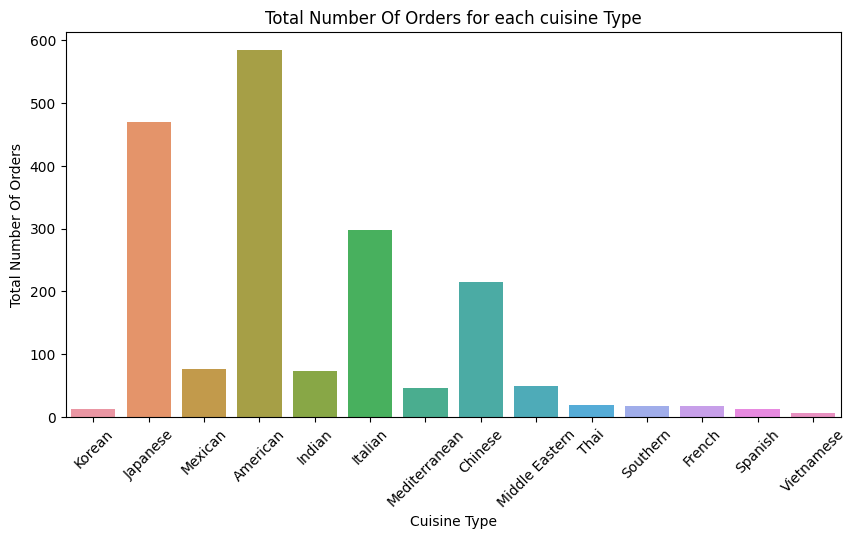

List of cuisine type:
['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']
The 3 most popular cuisine type:
American    584
Japanese    470
Italian     298
Name: cuisine_type, dtype: int64
The 3 least popular cuisine type:
Korean        13
Spanish       12
Vietnamese     7
Name: cuisine_type, dtype: int64


In [19]:
##################################################
#To plot the total Number Of Orders for each cuisine Type

plt.figure(figsize = (10,5))
g=sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.
plt.xticks(rotation=45)
g.set(xlabel='Cuisine Type', ylabel='Total Number Of Orders', title='Total Number Of Orders for each cuisine Type')
plt.show()

print("List of cuisine type:")
print(df['cuisine_type'].unique())

print("The 3 most popular cuisine type:")
print(df['cuisine_type'].value_counts().head(3))

print("The 3 least popular cuisine type:")
print(df['cuisine_type'].value_counts().tail(3))

##################################################

#From the result we can see that
#The 3 most popular food are (in decending order of number of order):
# 1) American
# 2) Japanese
# 3) Italian

#The 3 least popular food are(in ascending order of number of order):
# 1) Vietnamese
# 2) Spanish
# 3) Korean



Result as below:

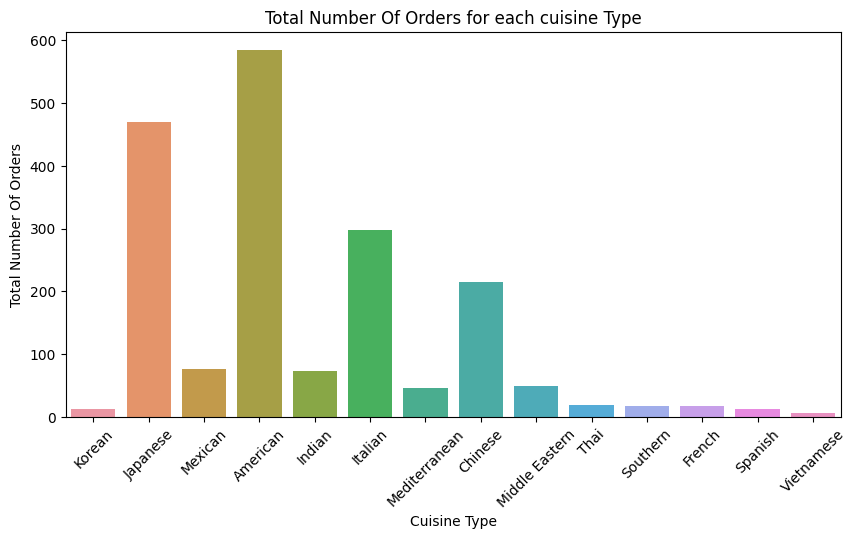


From the graph, we see that the top 3 most popular food style are:

1) American

2) Japanese

3) Italian

The least popular is Vietnamese


['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']
[2.6, 16.21, 7.0, 14.24, 5.21, 9.61, 9.2, 13.44, 7.0, 2.11, 8.5, 6.0, 4.0, 2.33]


<Figure size 1000x500 with 0 Axes>

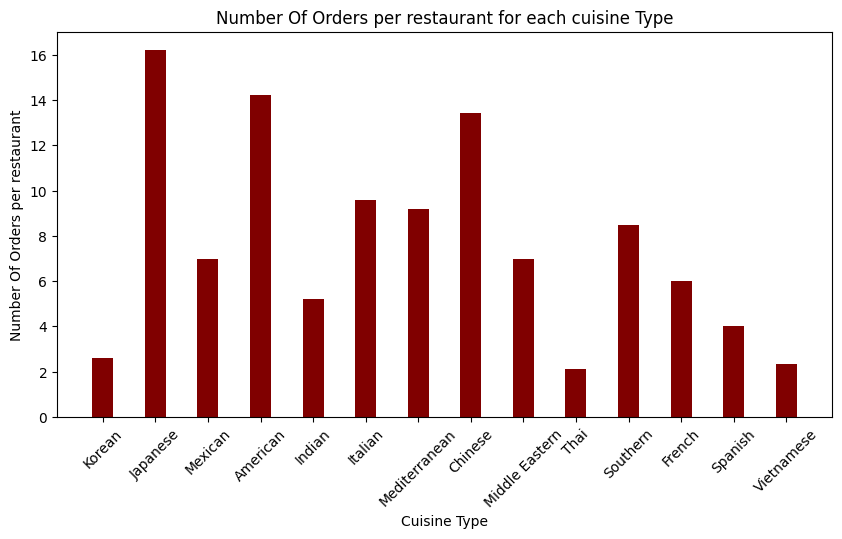

In [20]:
##################################################
#To plot the number Of orders per restaurant for each cuisine Type

plt.figure(figsize = (10,5))
list_of_cuisine_type=df['cuisine_type'].unique()
print(list_of_cuisine_type)
num_of_order_per_rest=[]
for cuisine_type in list_of_cuisine_type:
#  print(cuisine_type)
  df2=df.copy()
  df2=df2[df2['cuisine_type']==cuisine_type]
  num_of_order_this_cuisine_type=len(df2)
  num_of_rest_this_cuisine_type=len(df2['restaurant_name'].unique())
#  print(num_of_order_this_cuisine_type)
#  print(num_of_rest_this_cuisine_type)
  num_of_order_per_rest.append(round(num_of_order_this_cuisine_type/num_of_rest_this_cuisine_type,2))


print(num_of_order_per_rest)

#fig = plt.figure(figsize = (10, 5))
# creating the bar plot
#plt.bar(courses, values, color ='maroon',
#        width = 0.4)

#plt.xlabel("Courses offered")
#plt.ylabel("No. of students enrolled")
#plt.title("Students enrolled in different courses")
#plt.show()

fig = plt.figure(figsize = (10, 5))
g1=plt.bar(list_of_cuisine_type, num_of_order_per_rest, color ='maroon',
        width = 0.4)
#g1.set(xlabel='Cuisine Type', ylabel='Number Of Orders per restaurant', title='Number Of Orders per restaurant for each cuisine Type')

plt.xlabel("Cuisine Type")
plt.ylabel("Number Of Orders per restaurant")
plt.title("Number Of Orders per restaurant for each cuisine Type")

plt.xticks(rotation=45)
plt.show()


#g=sns.countplot(data = num_of_order_per_rest, x = list_of_cuisine_type) ## Create a countplot for cuisine type.
#plt.xticks(rotation=45)
#g.set(xlabel='Cuisine Type', ylabel='Total Number Of Orders', title='Total Number Of Orders for each cuisine Type')
#plt.show()



#
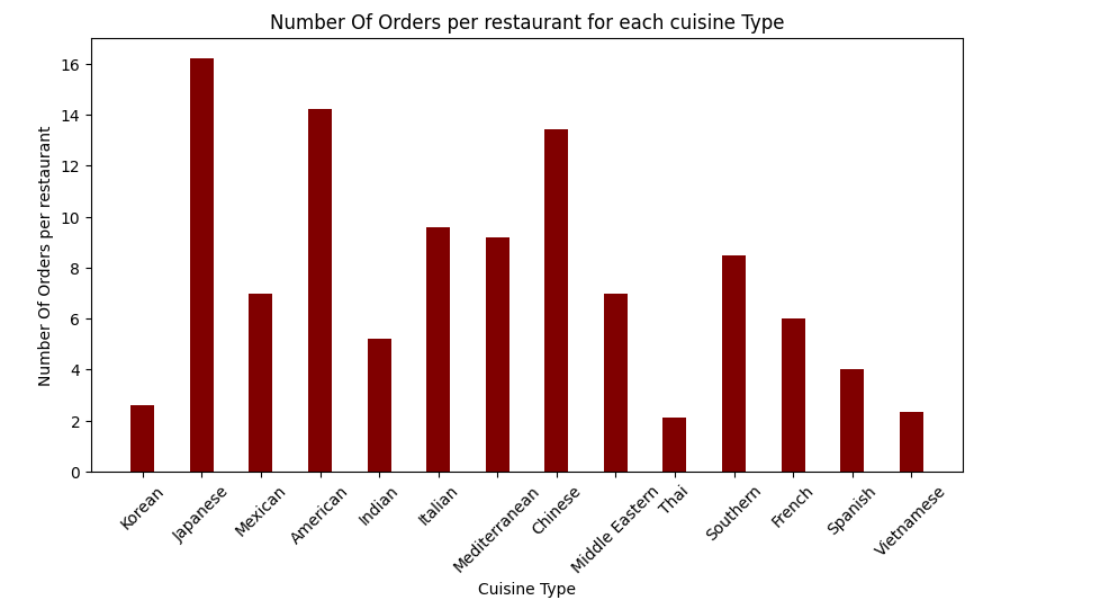

The 3 top food style are (in terms of number of order per restaurant):

1) Japanese

2) American

3) Chinese

Comparing with previous result we now got another different result.

The previous 3 most top result just shows the most popular food style. It

just consider the total number of order for ALL restaurant

of that particular cuisine type. It does NOT consider how many restaurant

provide food of that style. In order to know how large the market potential

of each food style is, we need to consider on average how many orders shared

by each restaurant of the corresponding cuisine type.

So now we know that Japanese stype restaurant shares most number of orders on

average and therefore the biggest market potential is Japanese. American comes

the second and Chinese ranked third.


The least market potentail food is Thai but not Vietnamese.







min_cost_of_the_order= 4.47
max_cost_of_the_order= 35.41
mean_cost_of_the_order= 16.5
median_cost_of_the_order= 14.14
mode_cost_of_the_order= 0    12.18
Name: cost_of_the_order, dtype: float64


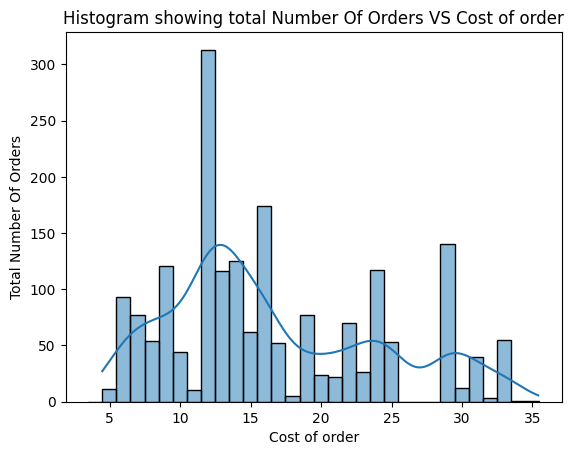

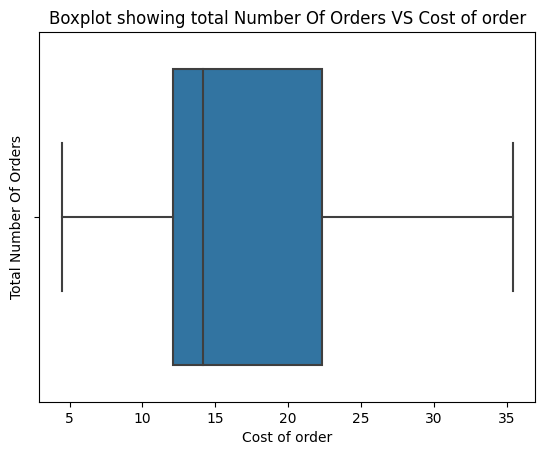

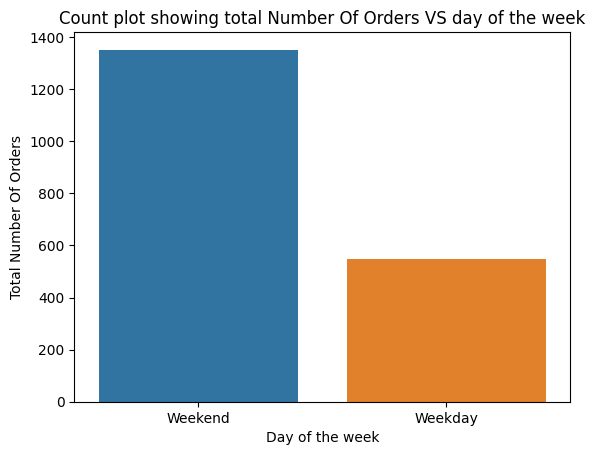

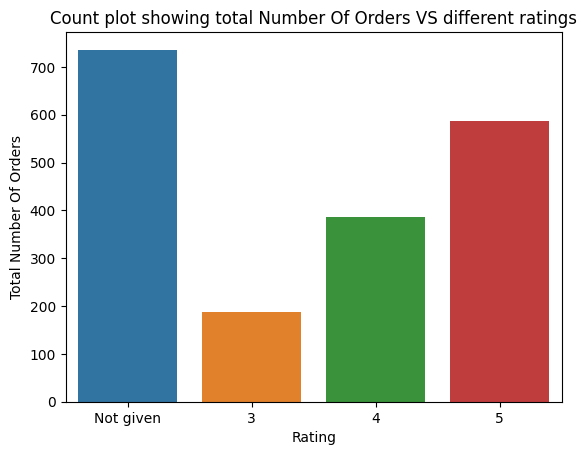

In [21]:
#To plot the following histograms/Boxplot/Countplot:
#Histogram showing total Number Of Orders VS Cost of order
#Boxplot showing total Number Of Orders VS Cost of order
#Count plot showing total Number Of Orders VS day of the week
#Count plot showing total Number Of Orders VS different ratings


min_cost_of_the_order=df['cost_of_the_order'].min()
max_cost_of_the_order=df['cost_of_the_order'].max()
mean_cost_of_the_order=round(df['cost_of_the_order'].mean(),2)
median_cost_of_the_order=round(df['cost_of_the_order'].median(),2)
mode_cost_of_the_order=round(df['cost_of_the_order'].mode(),2)

print("min_cost_of_the_order=",min_cost_of_the_order)
print("max_cost_of_the_order=",max_cost_of_the_order)
print("mean_cost_of_the_order=",mean_cost_of_the_order)
print("median_cost_of_the_order=",median_cost_of_the_order)
print("mode_cost_of_the_order=",mode_cost_of_the_order)
cost_bins=np.arange(min_cost_of_the_order-1, max_cost_of_the_order+1, 1)
#print(cost_bins)
g1=sns.histplot(data=df,x='cost_of_the_order',bins=cost_bins, kde=True) ## Histogram for the cost of order

#plt.xticks(rotation=45)
g1.set(xlabel='Cost of order', ylabel='Total Number Of Orders', title='Histogram showing total Number Of Orders VS Cost of order')
plt.show()

g2=sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
g2.set(xlabel='Cost of order', ylabel='Total Number Of Orders', title='Boxplot showing total Number Of Orders VS Cost of order')

plt.show()

df['day_of_the_week'].nunique()
g3=sns.countplot(data = df, x = 'day_of_the_week')
g3.set(xlabel='Day of the week', ylabel='Total Number Of Orders', title='Count plot showing total Number Of Orders VS day of the week')
plt.show()

rating_order=['Not given','3','4','5']
g4=sns.countplot(data = df, x = 'rating', order=rating_order)

g4.set(xlabel='Rating', ylabel='Total Number Of Orders', title='Count plot showing total Number Of Orders VS different ratings')
plt.show()




This is the result

min_cost_of_the_order= 4.47

max_cost_of_the_order= 35.41

mean_cost_of_the_order= 16.5

median_cost_of_the_order= 14.14

mode_cost_of_the_order= 0    12.18

Name: cost_of_the_order, dtype: float64

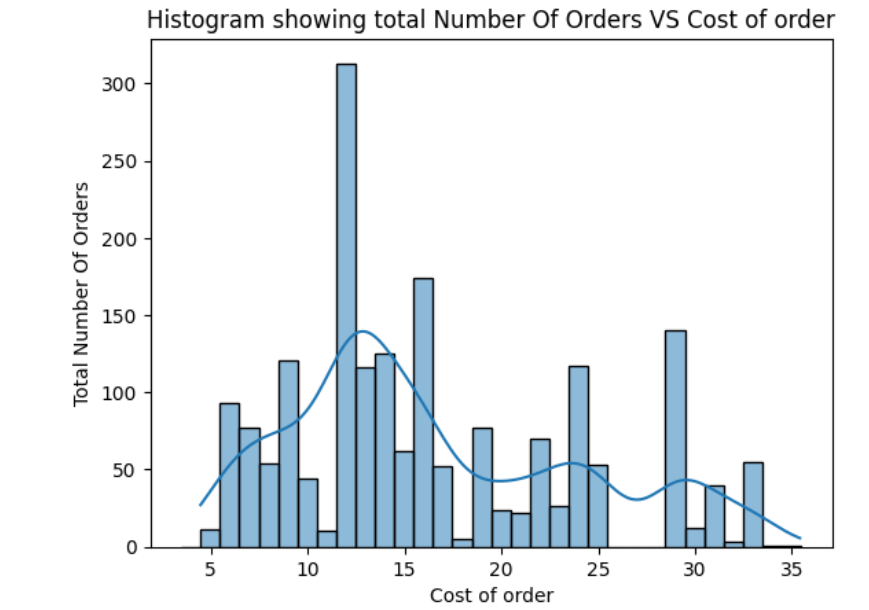

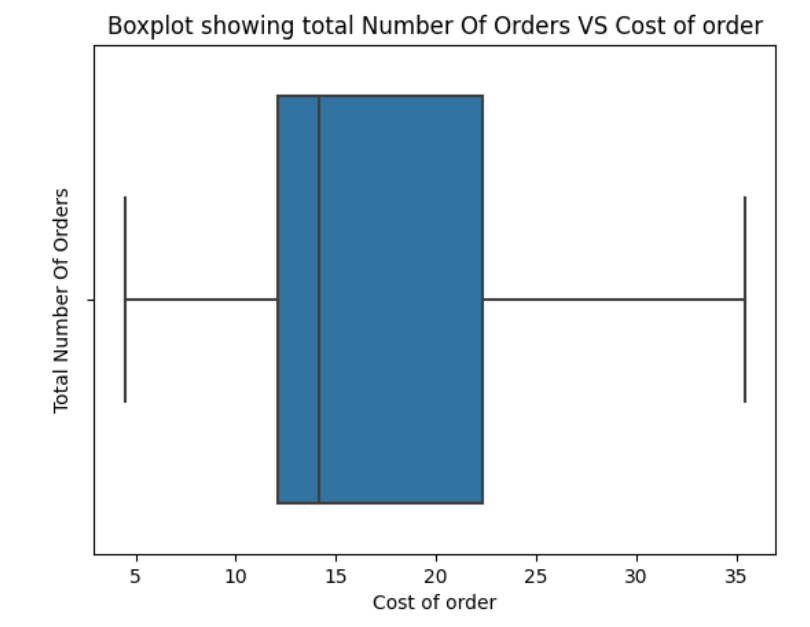

We can see the number of order during weekend is much more than that of weekday

according to the following:


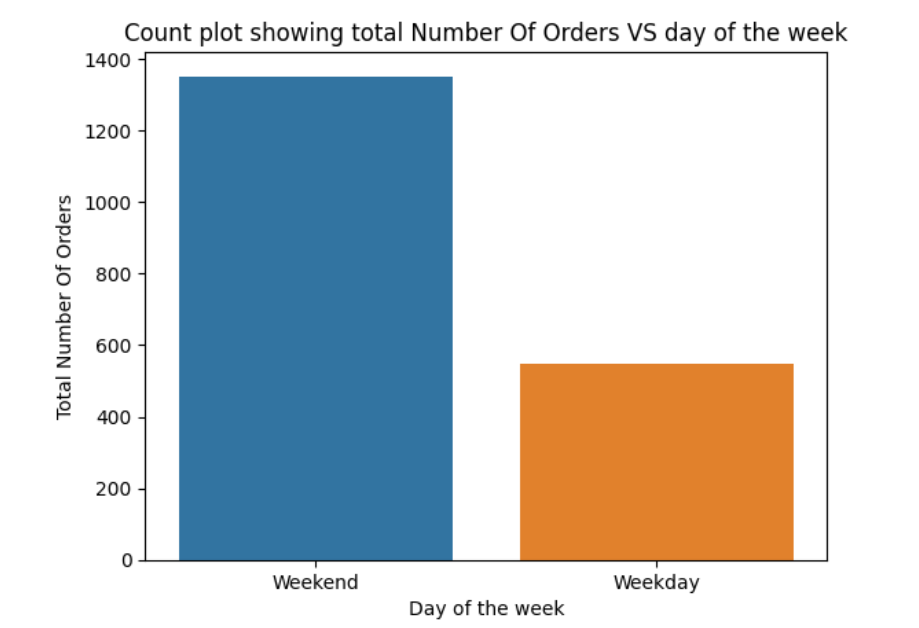





From the figure we see that most people decided not to provide rating.
For all the ratings, most people rate 5, and least people rate 3.

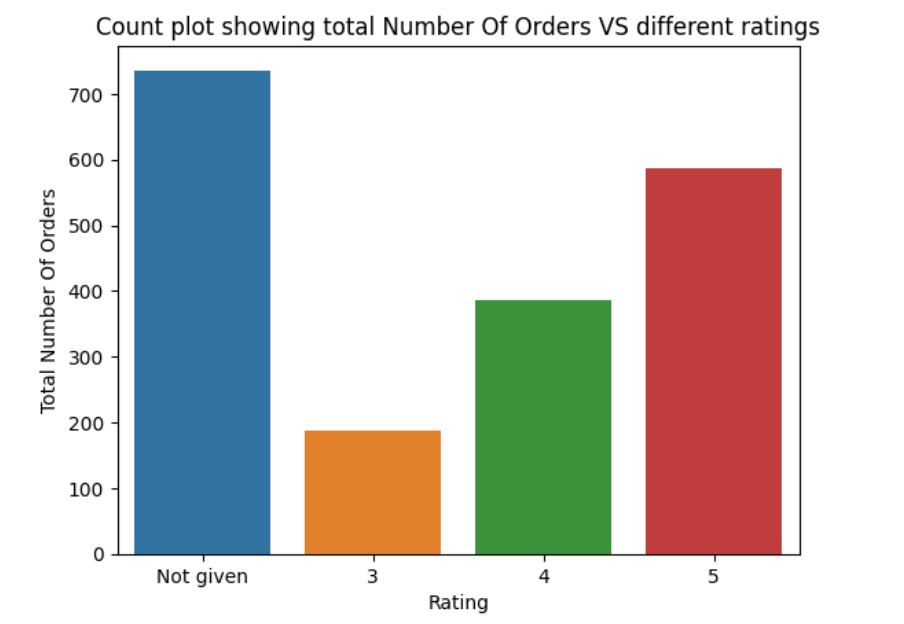


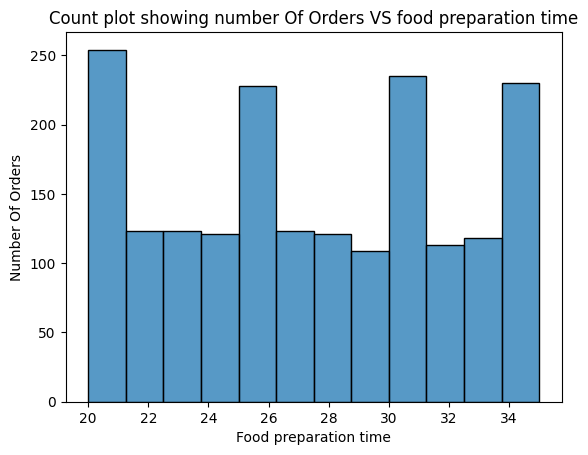

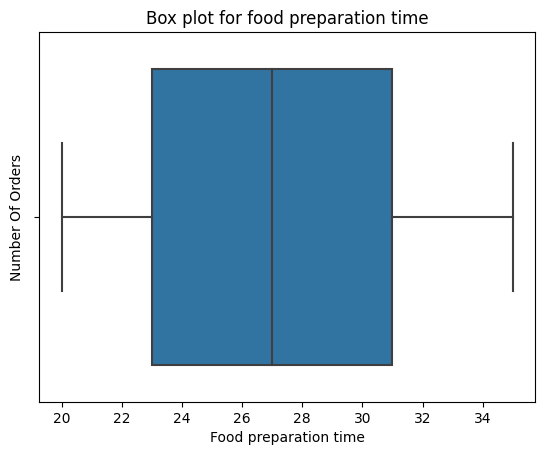

In [22]:
#To plot the following:
# Count plot showing number Of Orders VS food preparation time
# Box plot for food preparation time

g5=sns.histplot(data=df,x='food_preparation_time') ## Complete the code to plot the histogram for the cost of order
g5.set(xlabel='Food preparation time', ylabel='Number Of Orders', title='Count plot showing number Of Orders VS food preparation time')
plt.show()
g6=sns.boxplot(data=df,x='food_preparation_time') ## Complete the code to plot the boxplot for the cost of order
g6.set(xlabel='Food preparation time', ylabel='Number Of Orders', title='Box plot for food preparation time')
plt.show()

This is the result of plot:

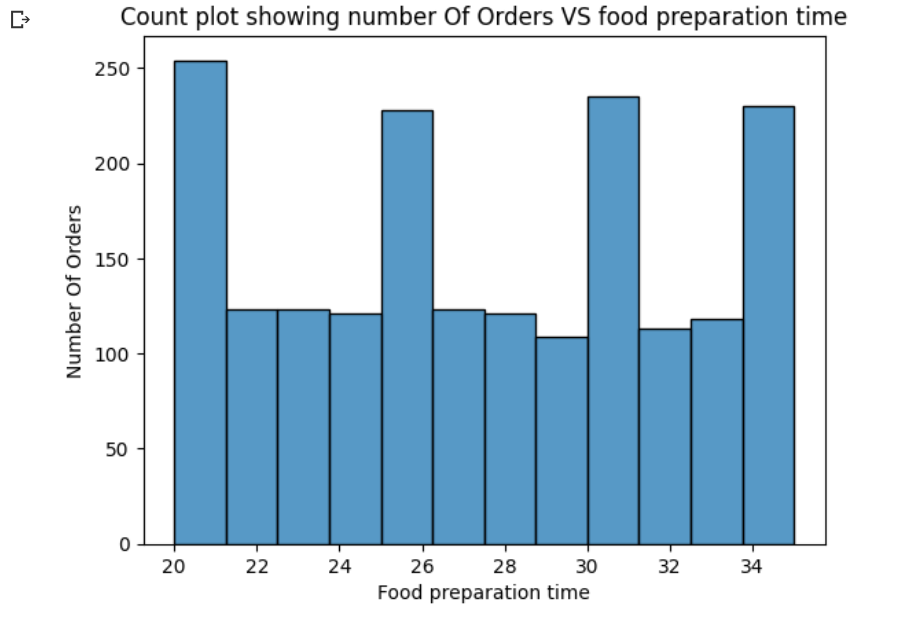

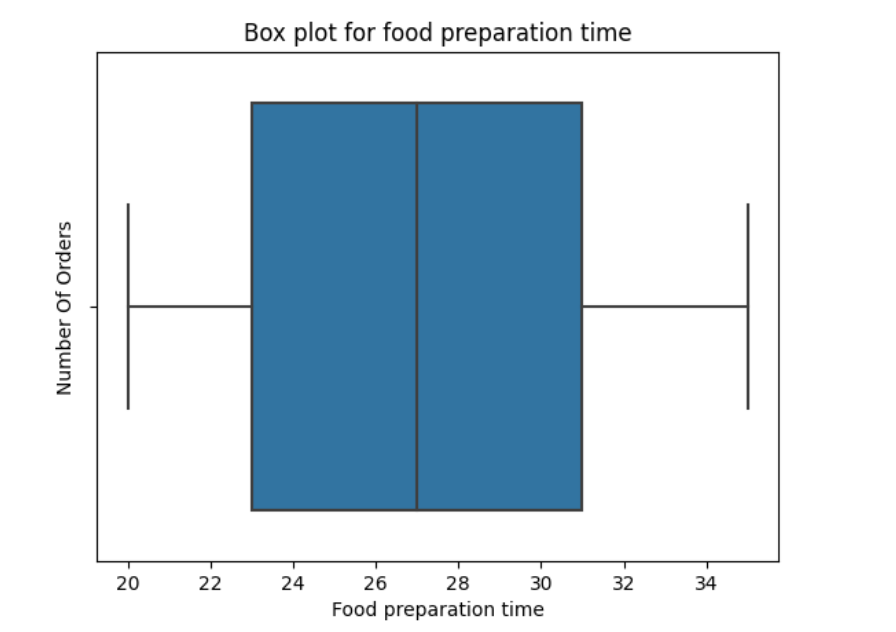

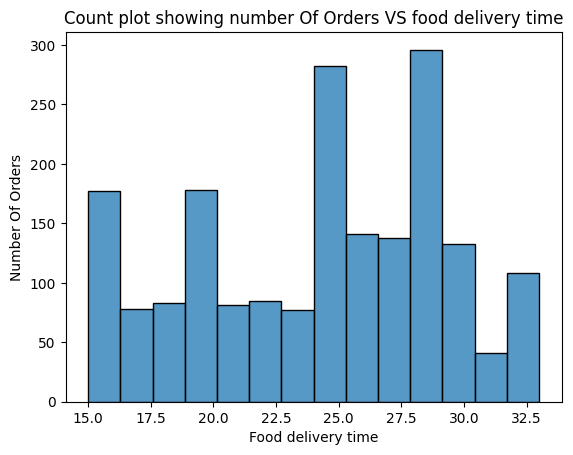

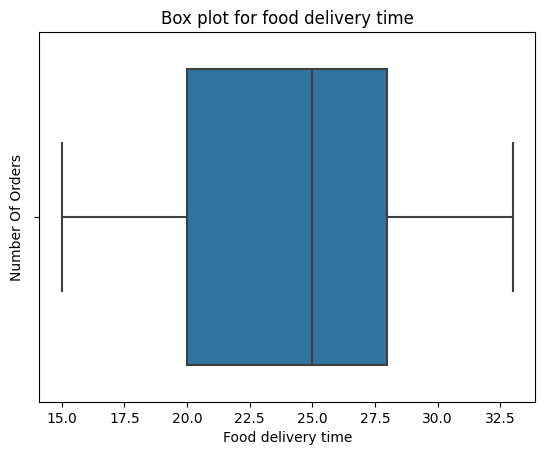

In [23]:

#To plot the following:
# Count plot showing number Of Orders VS food delivery time
# Box plot for food delivery time

g7=sns.histplot(data=df,x='delivery_time') ## Complete the code to plot the histogram for the cost of order
g7.set(xlabel='Food delivery time', ylabel='Number Of Orders', title='Count plot showing number Of Orders VS food delivery time')
plt.show()
g8=sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the cost of order
g8.set(xlabel='Food delivery time', ylabel='Number Of Orders', title='Box plot for food delivery time')
plt.show()


This is the result:


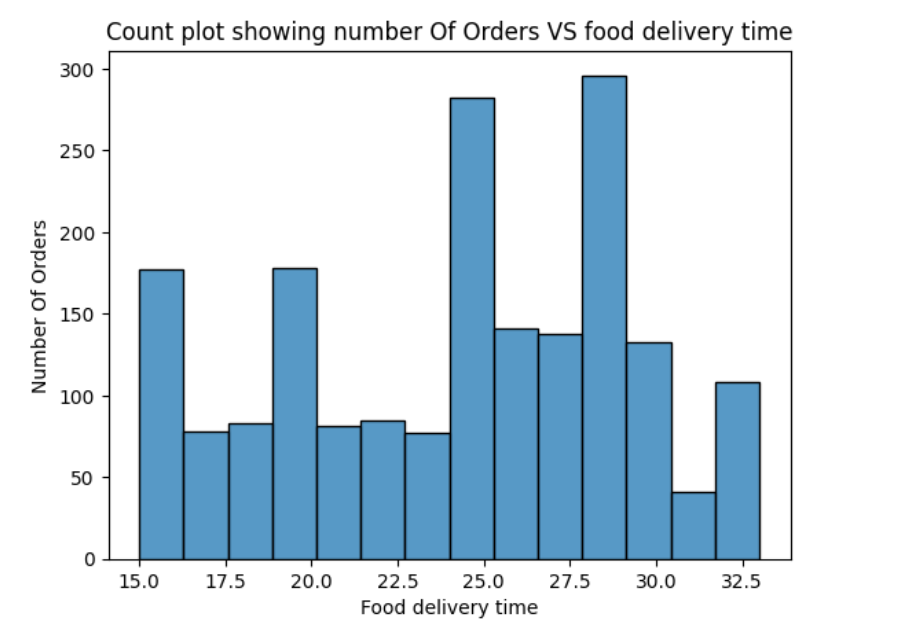

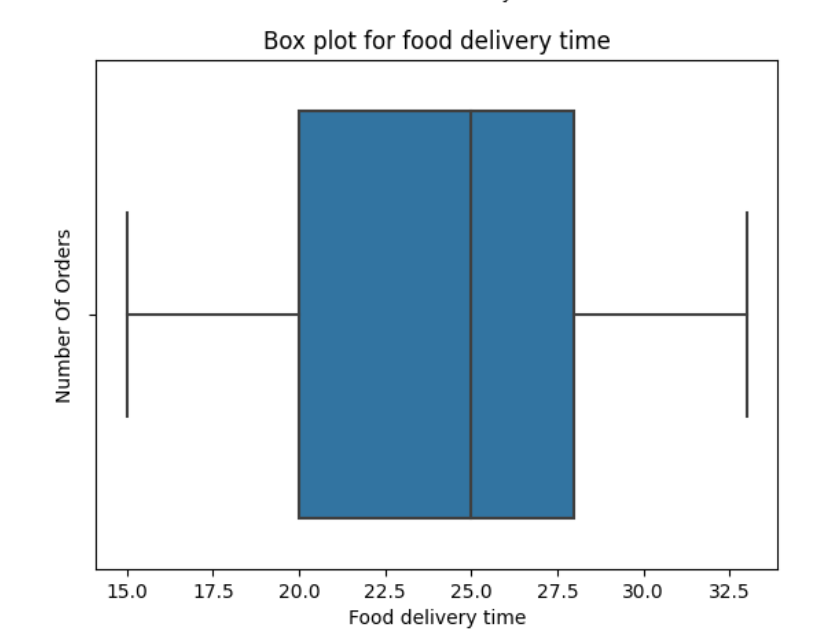

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [24]:
# Write the code here
#compute the top 5 restaurants in terms of the number of orders received
#cheese.sort_values(by=['Name of column']).head(5)
#df.sort_values(by=['Name of column']).head(5)
top_5_restaurant=df['restaurant_name'].value_counts().head()
print(top_5_restaurant)

#Here is the results which shows the top 5 restaurants in terms of number of orders received:
#Shake Shack                  219
#The Meatball Shop            132
#Blue Ribbon Sushi            119
#Blue Ribbon Fried Chicken     96
#Parm                          68



Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:
#Here is the results which shows the top 5 restaurants in terms of number of orders received:
#Shake Shack                  219
#The Meatball Shop            132
#Blue Ribbon Sushi            119
#Blue Ribbon Fried Chicken     96
#Parm                          68



### **Question 8**: Which is the most popular cuisine on weekends?

In [25]:
# Write the code here
##compute the most popular cuisine on weekend
day_of_the_week_is_weekend=df['day_of_the_week']=='Weekend'
df['cuisine_type'][day_of_the_week_is_weekend].value_counts().head(1)


#Result:
#American    415
# So the most popular cuisine in weekend is 'American' with 415 orders




American    415
Name: cuisine_type, dtype: int64

#### Observations:
#Result:
#American    415
# So the most popular cuisine in weekend is 'American' with 415 orders



### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [26]:
# Write the code here
##compute the percentage of the orders cost more than 20 dollars

is_orders_more_than_20=df['cost_of_the_order'] > 20.0
num_of_order_more_than_20=df['cost_of_the_order'][is_orders_more_than_20].count()
print("Number of orders more than 20 dollars =", num_of_order_more_than_20)
total_num_of_orders=df.shape[0]
percent_of_orders_over_20=round((num_of_order_more_than_20/total_num_of_orders)*100.0,2)
print("percent_of_orders_over_20_dollars=",percent_of_orders_over_20,"%")
#Result:
#Number of orders more than 20 dollars = 555


Number of orders more than 20 dollars = 555
percent_of_orders_over_20_dollars= 29.24 %


#### Observations:

Number of orders more than 20 dollars = 555

percent_of_orders_over_20_dollars= 29.24 %

### **Question 10**: What is the mean order delivery time?

In [28]:
# Write the code here
##compute the mean order delivery time

mean_delivery_time=round(df['delivery_time'].mean(),2)
print("Mean order delivery time(in mins) =", mean_delivery_time)

#Result:
#Mean order delivery time(in mins) = 24.16


Mean order delivery time(in mins) = 24.16


#### Observations:

#Result:
#Mean order delivery time(in mins) = 24.16


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [29]:
# Write the code here
#The company has decided to give 20% discount vouchers to the top 3 most frequent customers.
##compute the IDs of these customers and the number of orders they placed

print(df['customer_id'].value_counts().head(3))


#This is the result which shows the top 3 most frequent customers:
# Customer ID      Number Of Orders
# 52832            13
# 47440            10
# 83287            9


52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:

#This is the result which shows the top 3 most frequent customers:
# Customer ID          Number Of Orders
# 52832                13
# 47440                10
# 83287                9



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

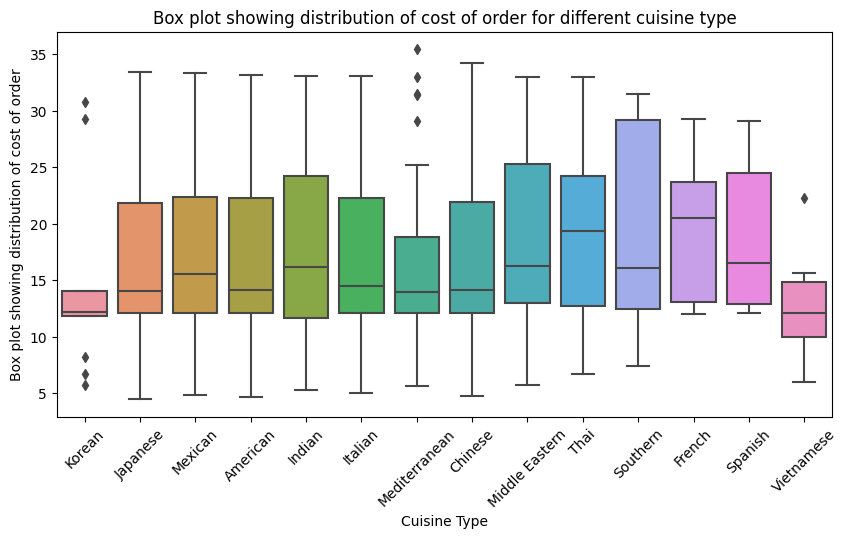

In [30]:
#Plot box plot showing distribution of cost of order for different cuisine type
plt.figure(figsize=(10,5))
g1=sns.boxplot(data = df, x = "cuisine_type", y = "cost_of_the_order")
plt.xticks(rotation = 45)
g1.set(xlabel='Cuisine Type', ylabel='Box plot showing distribution of cost of order', title='Box plot showing distribution of cost of order for different cuisine type')
plt.show()


This is the result:

The french style seems to be most expensive whereas vietnamese style seems to

be cheapest.


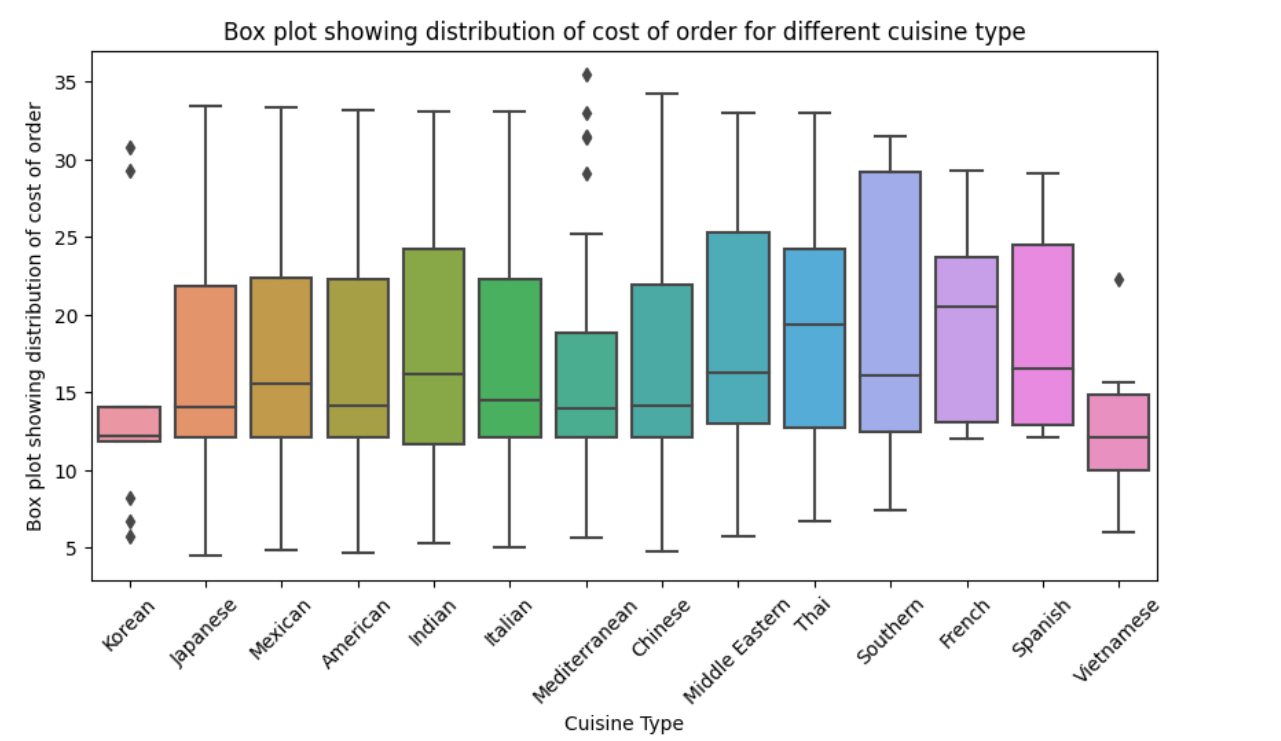

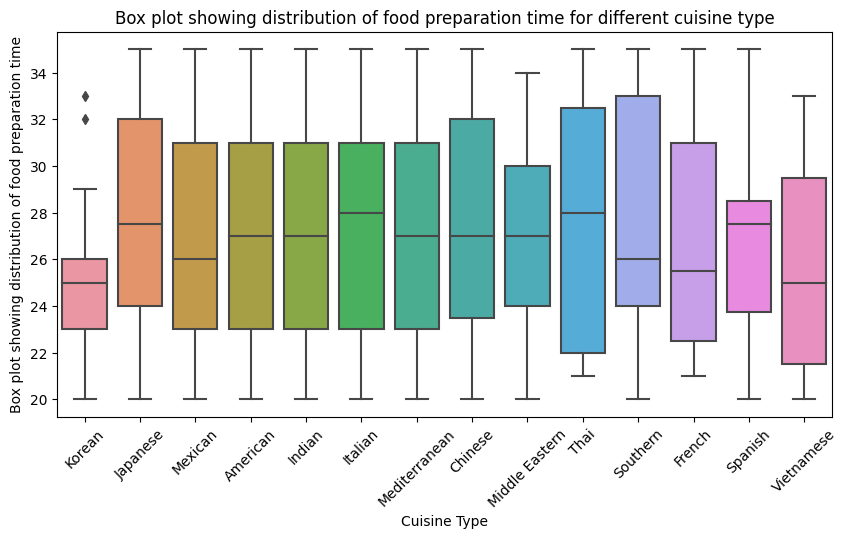

In [31]:
#Plot box plot showing distribution of food preparation time for different cuisine type

plt.figure(figsize=(10,5))
g1=sns.boxplot(data = df, x = "cuisine_type", y = "food_preparation_time")
plt.xticks(rotation = 45)
g1.set(xlabel='Cuisine Type', ylabel='Box plot showing distribution of food preparation time', title='Box plot showing distribution of food preparation time for different cuisine type')
plt.show()


Thai food seems to be longest preparation time

whereas Korean food seems to be shortest preparation

time according to the following:

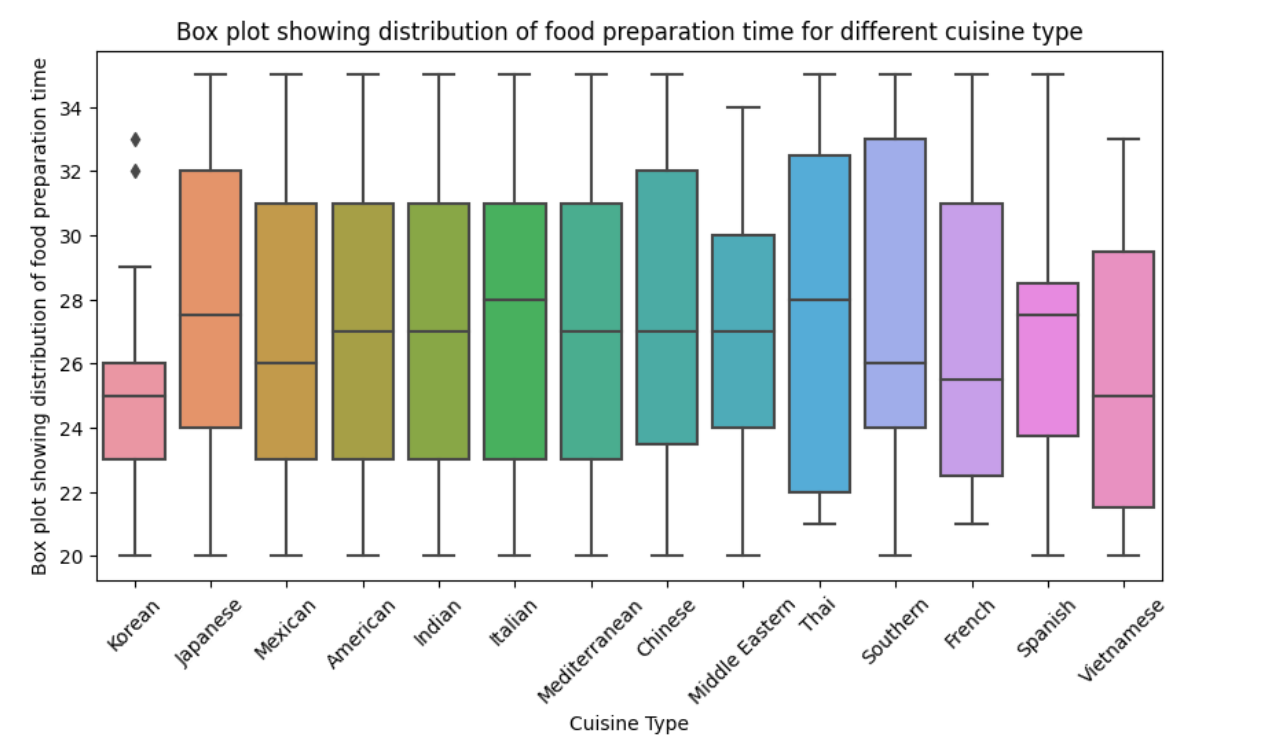

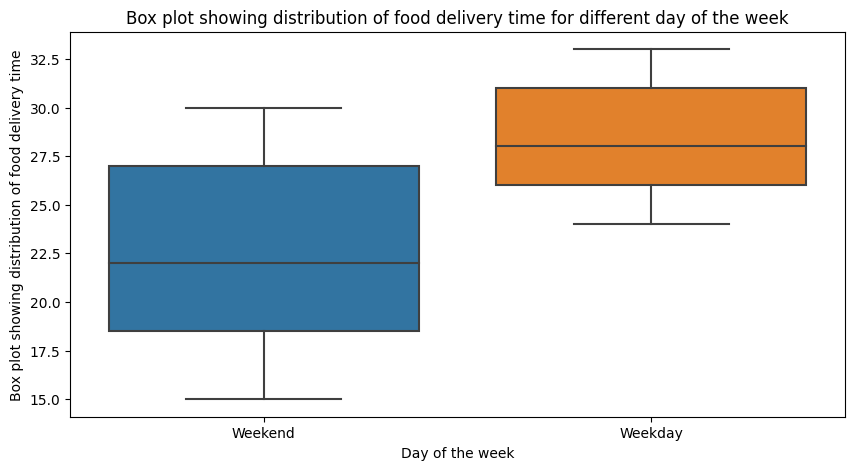

In [32]:
#Plot box plot showing distribution of food delivery time for different day of the week

plt.figure(figsize=(10,5))
g1=sns.boxplot(data = df, x = "day_of_the_week", y = "delivery_time")
#plt.xticks(rotation = 45)
g1.set(xlabel='Day of the week', ylabel='Box plot showing distribution of food delivery time', title='Box plot showing distribution of food delivery time for different day of the week')
plt.show()



Result shows that weekday delivery time is much longer than weekend

delivery time because from Monday to Friday many people go to work and therefore

very likely that large number of orders were made during lunch hour that only

limited manpower to deliver the food during this short period of time (assume

lunch hour last for 1 to 2 hours). As a result the time required to deliver the

food is longer during the weekday.

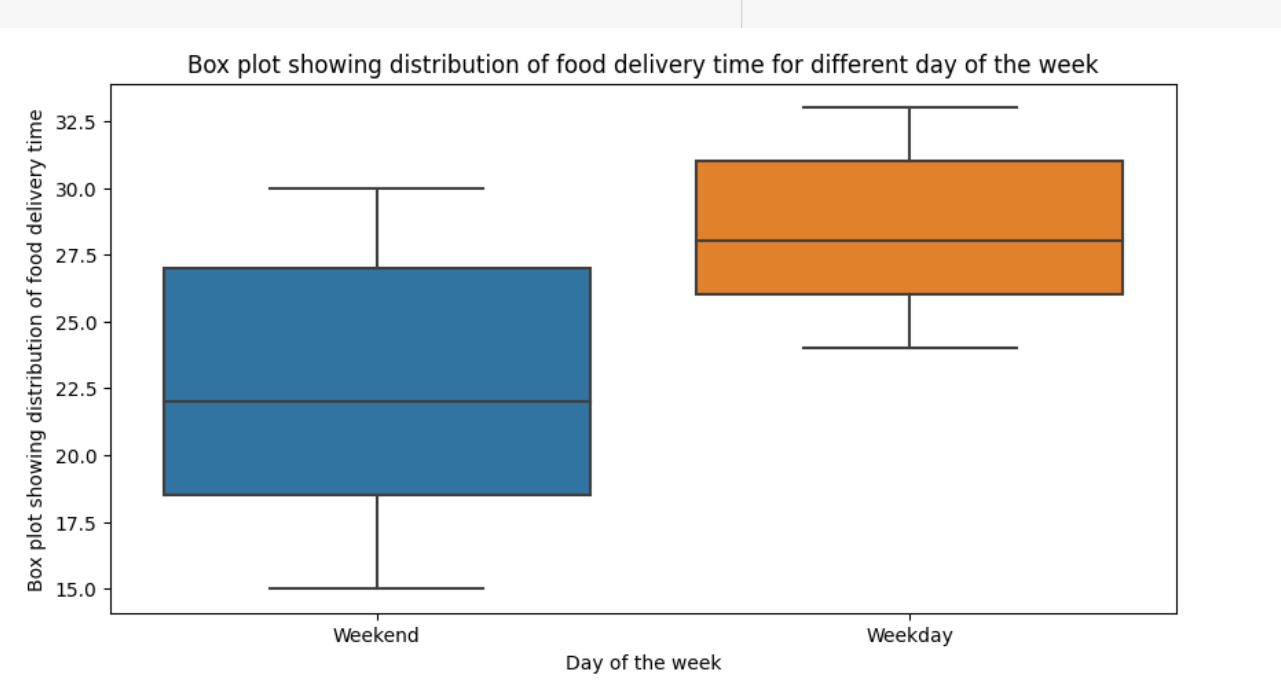

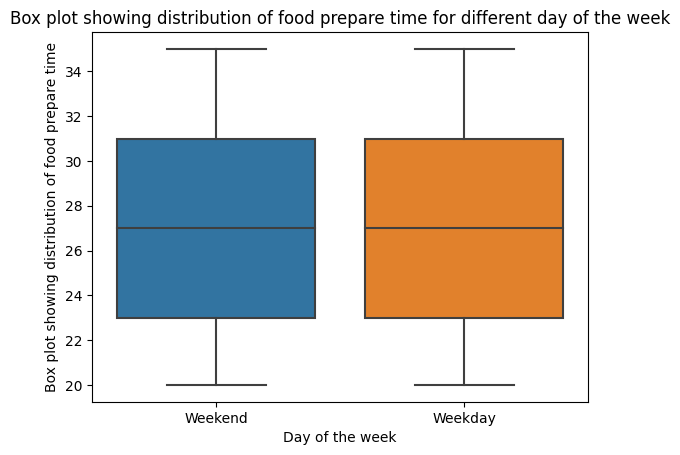

In [33]:
#Plot box plot showing distribution of food prepare time for different day of the week
#plt.figure(figsize=(10,5))
g1=sns.boxplot(data = df, x = "day_of_the_week", y = "food_preparation_time")
#plt.xticks(rotation = 45)
g1.set(xlabel='Day of the week', ylabel='Box plot showing distribution of food prepare time', title='Box plot showing distribution of food prepare time for different day of the week')
plt.show()



Result shows that there is almost no difference between weekend and weekday in

terms of food praparation time:

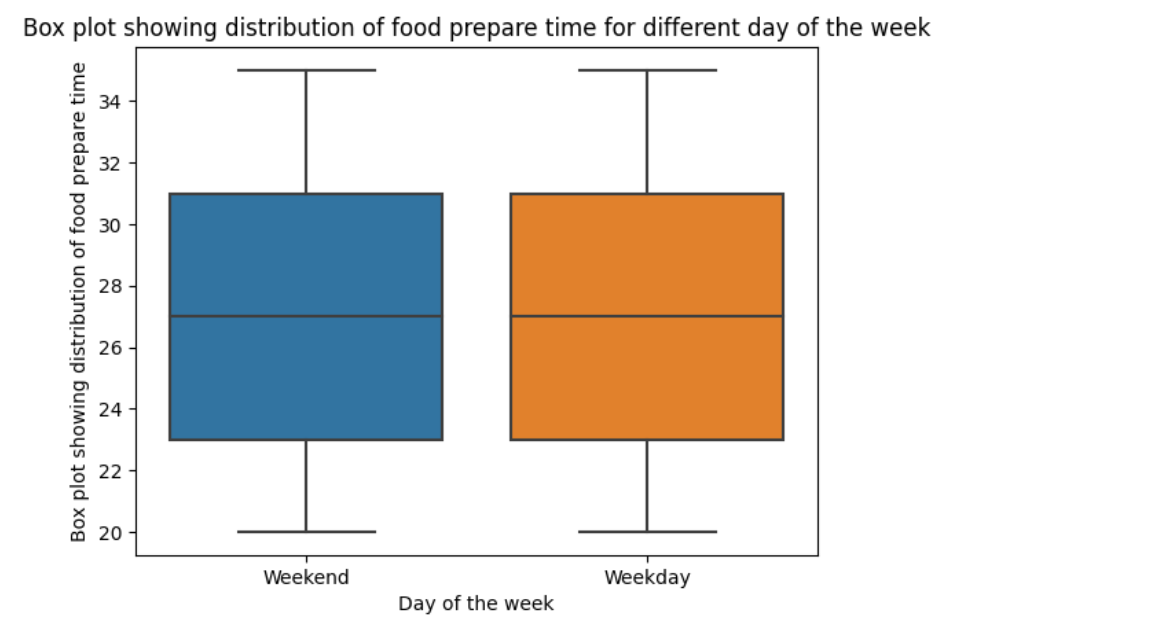

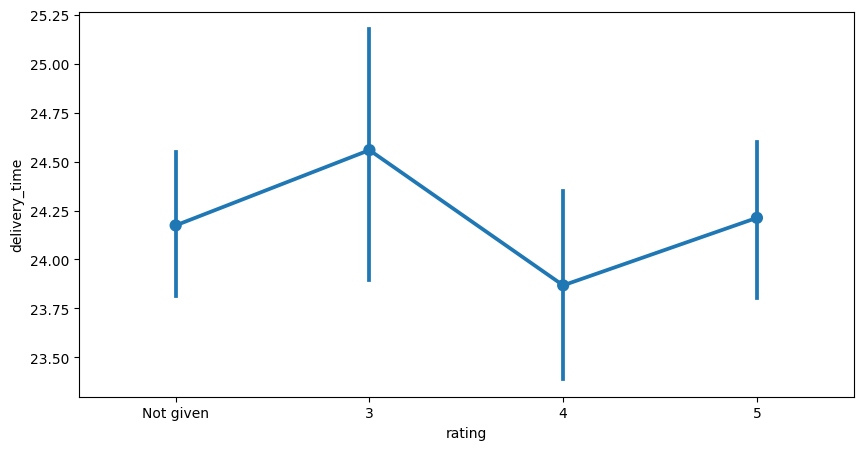

In [34]:
#Plot point plot showing distribution of food delivery time for different ratings

plt.figure(figsize=(10, 5))
rate_order=['Not given','3','4','5']
sns.pointplot(x = 'rating', y = 'delivery_time', data = df,order=rate_order)
plt.show()

#

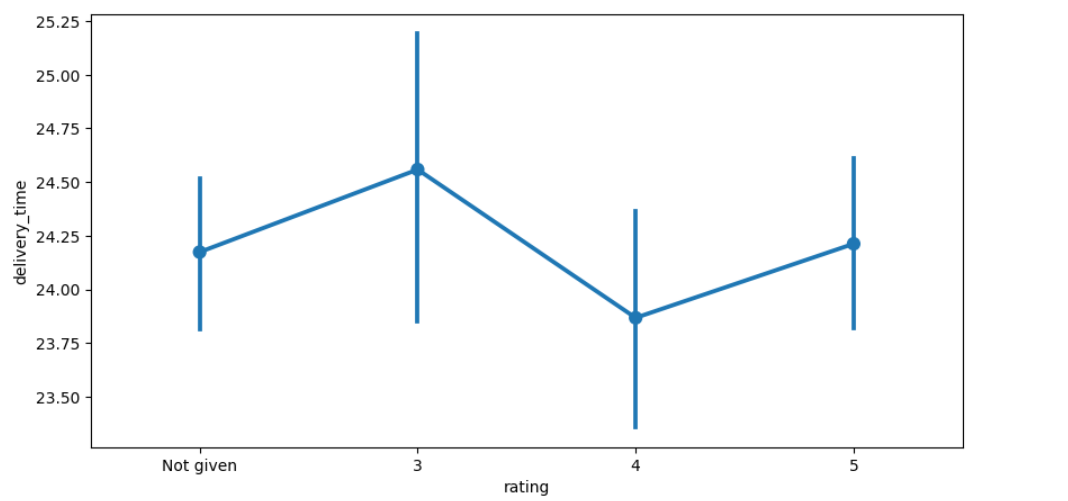

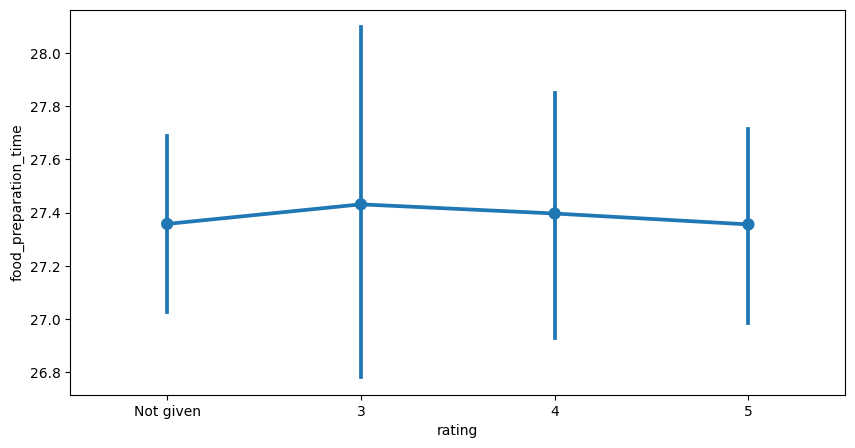

In [35]:
#Plot point plot showing distribution of food preparation time for different ratings

plt.figure(figsize=(10, 5))
rate_order=['Not given','3','4','5']
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df,order=rate_order)
plt.show()

#
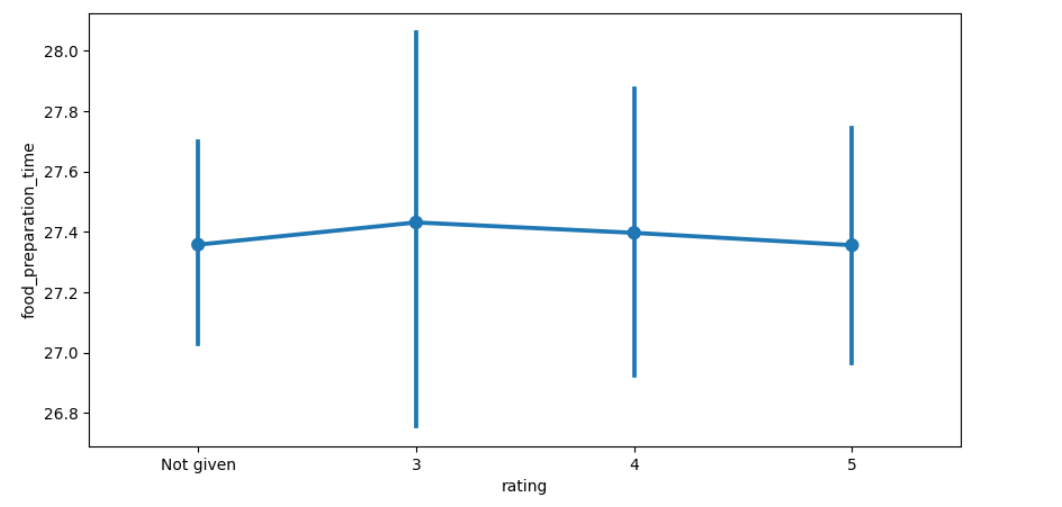

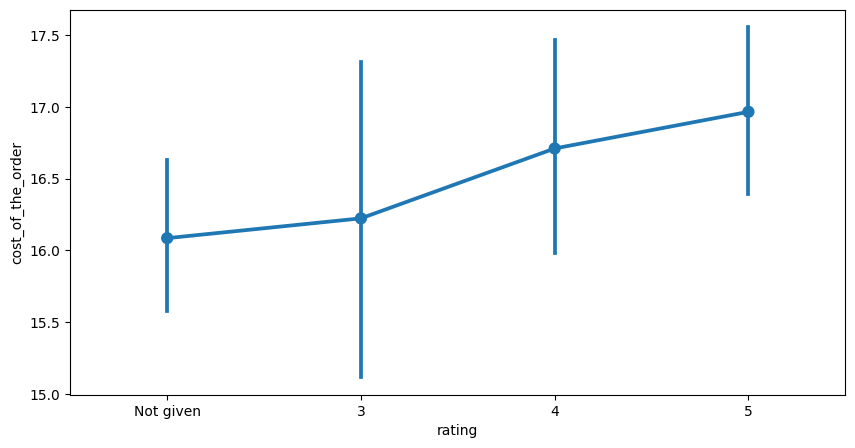

In [36]:
#Plot point plot showing distribution of food cost for different ratings


plt.figure(figsize=(10, 5))
rate_order=['Not given','3','4','5']
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df, order=rate_order)
plt.show()




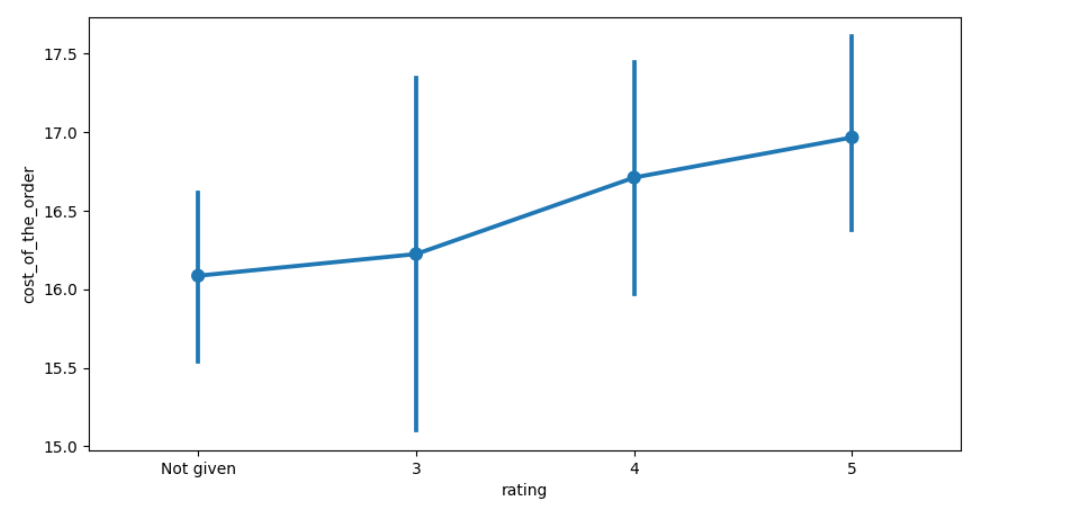

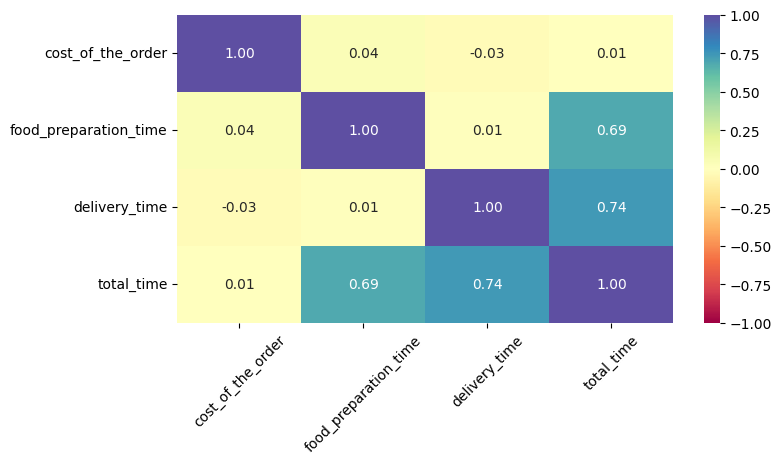

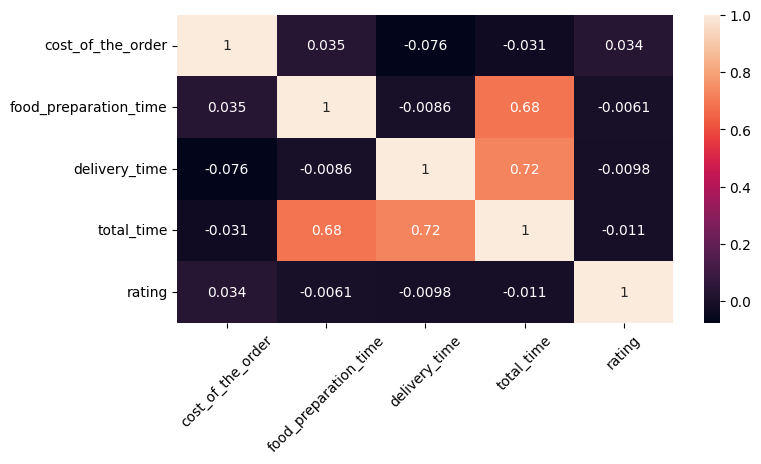

In [37]:
#Plot heat map to show correlation between 'cost_of_the_order', 'food_preparation_time', 'delivery_time','total_time'.

col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time','total_time']

df['total_time']=df['delivery_time']+df['food_preparation_time']

plt.figure(figsize=(8, 4))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.xticks(rotation = 45)
plt.show()

df2=df.copy()
df2=df2.drop(df[df['rating']=='Not given'].index)
#print(df.shape)
#print(df2.shape)

#df["a"] = pd.to_numeric(df["a"])
df2["rating"] = pd.to_numeric(df2["rating"])

#Plot heat map to show correlation between 'cost_of_the_order', 'food_preparation_time', 'delivery_time','total_time' and rating.

#df2['total_time']=df2['delivery_time']+df2['food_preparation_time']
#col_list2 = ['cost_of_the_order' ,'rating']
col_list2 = ['cost_of_the_order', 'food_preparation_time', 'delivery_time','total_time', 'rating']
#col_list2 = ['cost_of_the_order', 'delivery_time','total_time', 'rating']

plt.figure(figsize=(8, 4))
sns.heatmap(df2[col_list2].corr(), annot=True)
plt.xticks(rotation = 45)
plt.show()



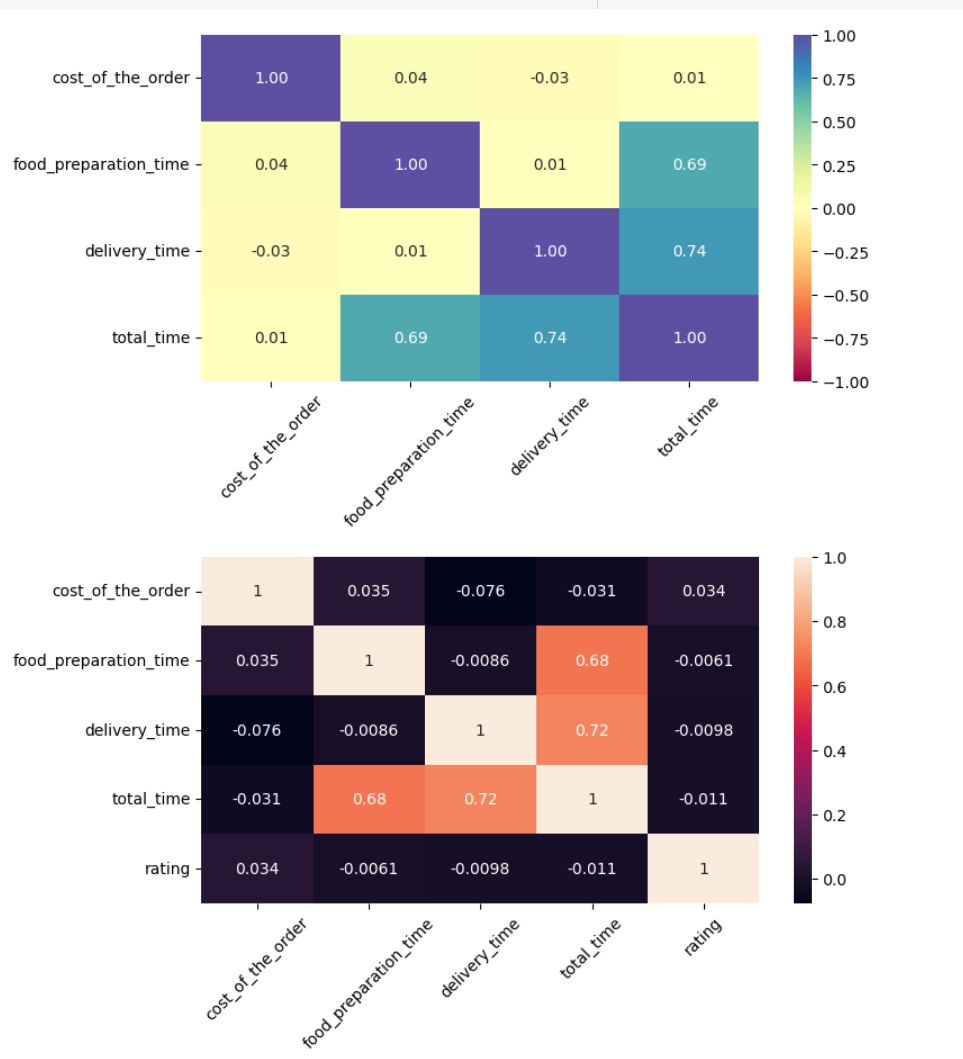


#####################################


We can see that there is some positive correlation between

cost of the food and preparation time. This is because more expensive food

means that it is higher class food and cheaper food means it is lower class

food such as fast food. Higher class food requires more time to prepare whereas

cheap food such as fast food requires less time to prepare. This matches with

our common sense intuitively.

###########################

Besides, negative correlation exists between cost of food

and delivery time. The more expensive food

requires less time to deliver. This is

reasonable that more expensive food is charged more

for the delivery services and therefore it make sense

for more expensive food to enjoy higher quality

of service in terms of deliver time and so less time is required

for delivery.

###########################

The rating has negative correlation with the total time (prepare+deliver),

this makes sense because the less time for customer to wait for the food,

the more satisfied with the quality of the service and higher the rating will be.

###########################

Besides, positive correlation between cost of food and rating.

More expensive food means better delivery services

and more likely that the customer is richer people.

These 2 factors together contribute to the higher rating.

###########################

Lastly, negative correlation between delivery time and preparation time.

This is because longer preparation time means the delivery worker

has waited for the food longer time and he need to speed up the delivery

of the food in order to avoid complain by the customer.






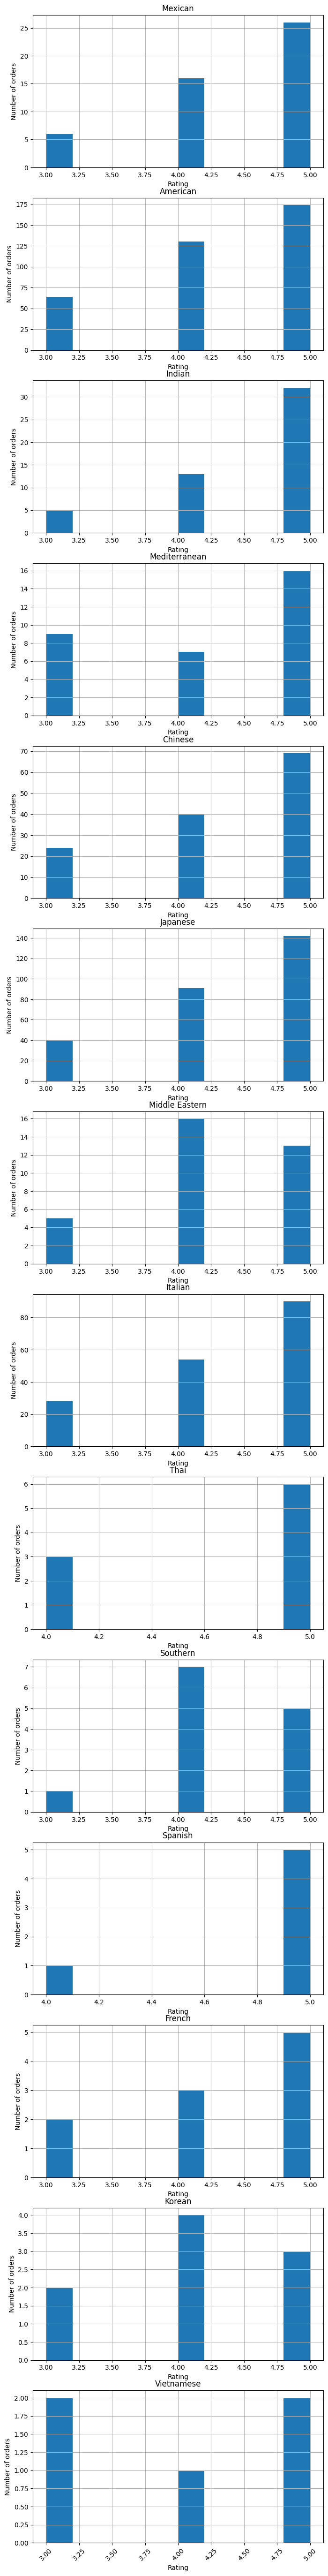

In [38]:
#Plot histogram to show distribution/count of rating for each cuisine type.
#-> 14  cuisine types, so there are 14 histogram for all 14 cuisine types.

df2=df.copy()
df2=df2.drop(df[df['rating']=='Not given'].index)
#print(df.shape)
#print(df2.shape)

#df["a"] = pd.to_numeric(df["a"])
df2["rating"] = pd.to_numeric(df2["rating"])


list_of_cuisine_type=df2['cuisine_type'].unique()
how_many_cuisine_type=len(list_of_cuisine_type)
fig_num_of_cols=3
fig_num_of_rows=int(how_many_cuisine_type/fig_num_of_cols)+1

f, axes = plt.subplots(how_many_cuisine_type, figsize=(8, 70))
#f, axes = plt.subplots(4,3, figsize=(8, 70))
#df2[df2['cuisine_type']=='Chinese']['rating'].hist(ax=axes[3])
i=0
for cuisine_type in list_of_cuisine_type:
 g1=df2[df2['cuisine_type']==cuisine_type]['rating'].hist(ax=axes[i])
 g1.set(title=cuisine_type,xlabel='Rating', ylabel='Number of orders')
 i=i+1

plt.xticks(rotation = 45)
plt.show()




This is the result:

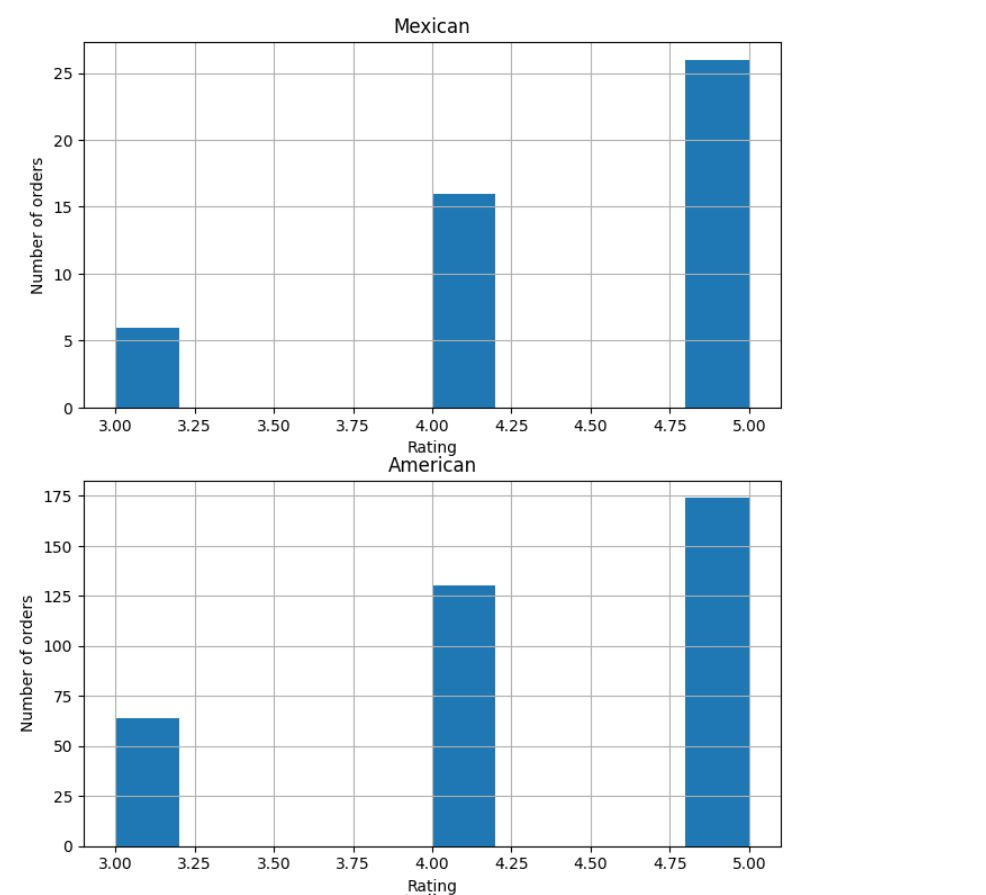


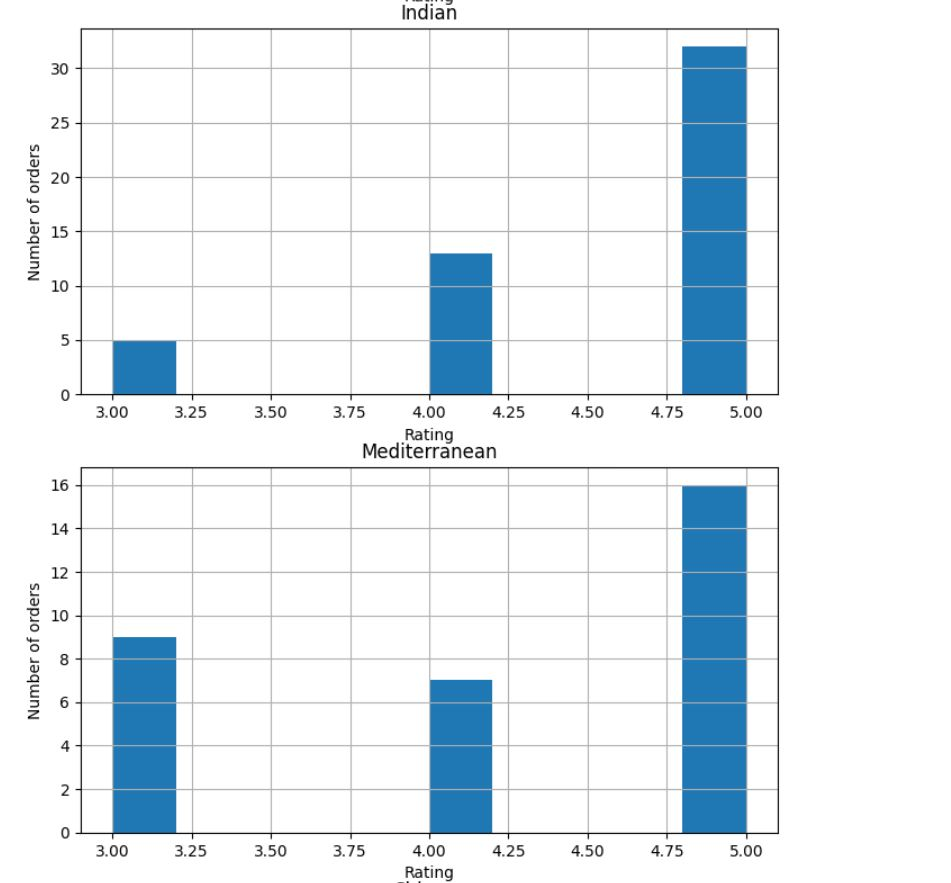

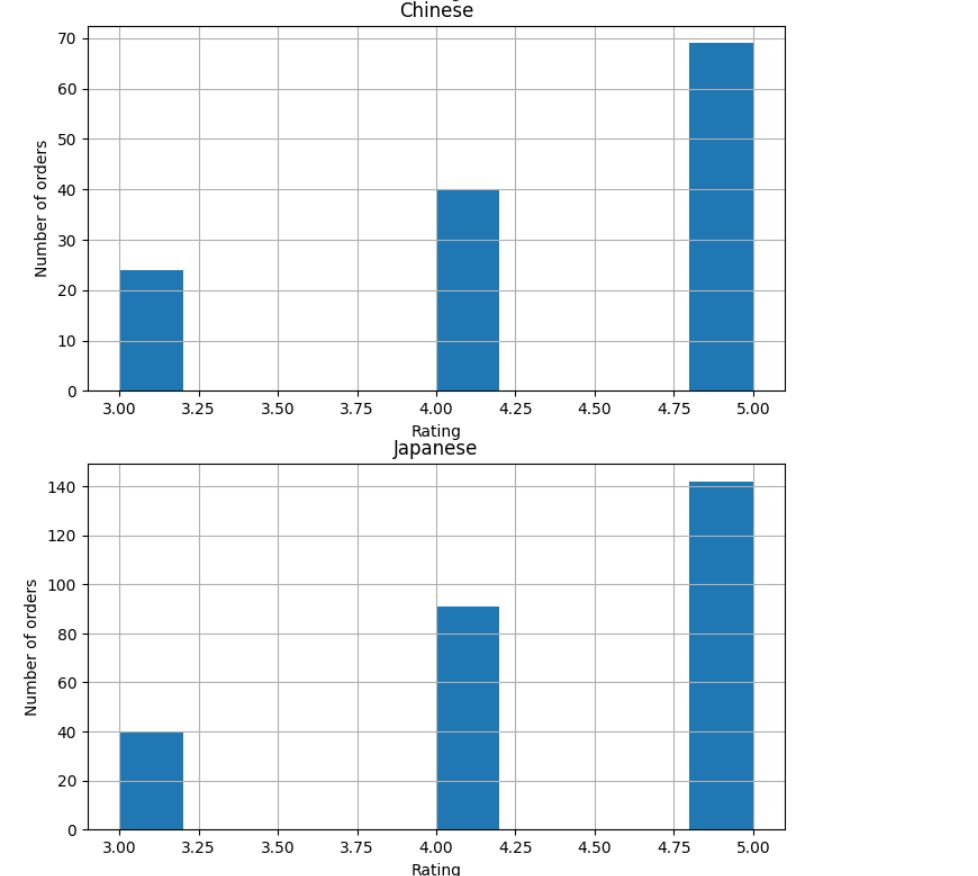

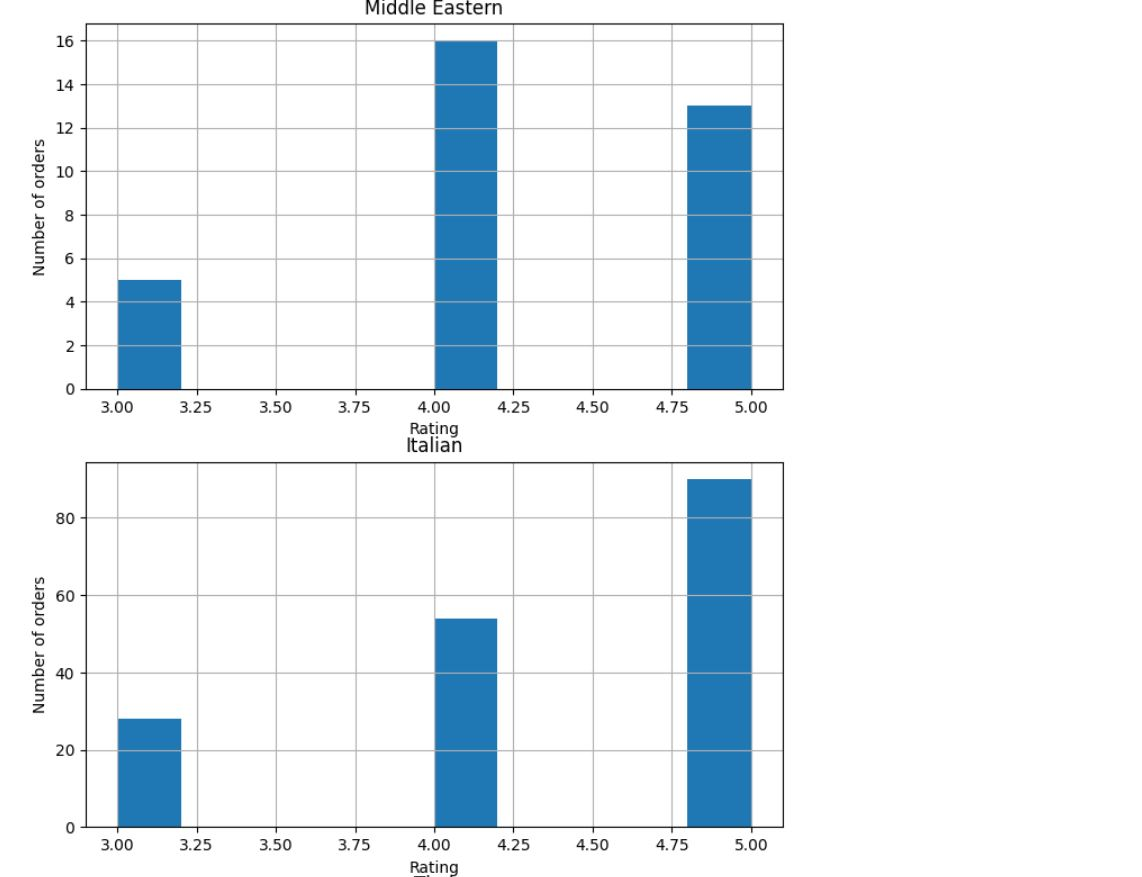


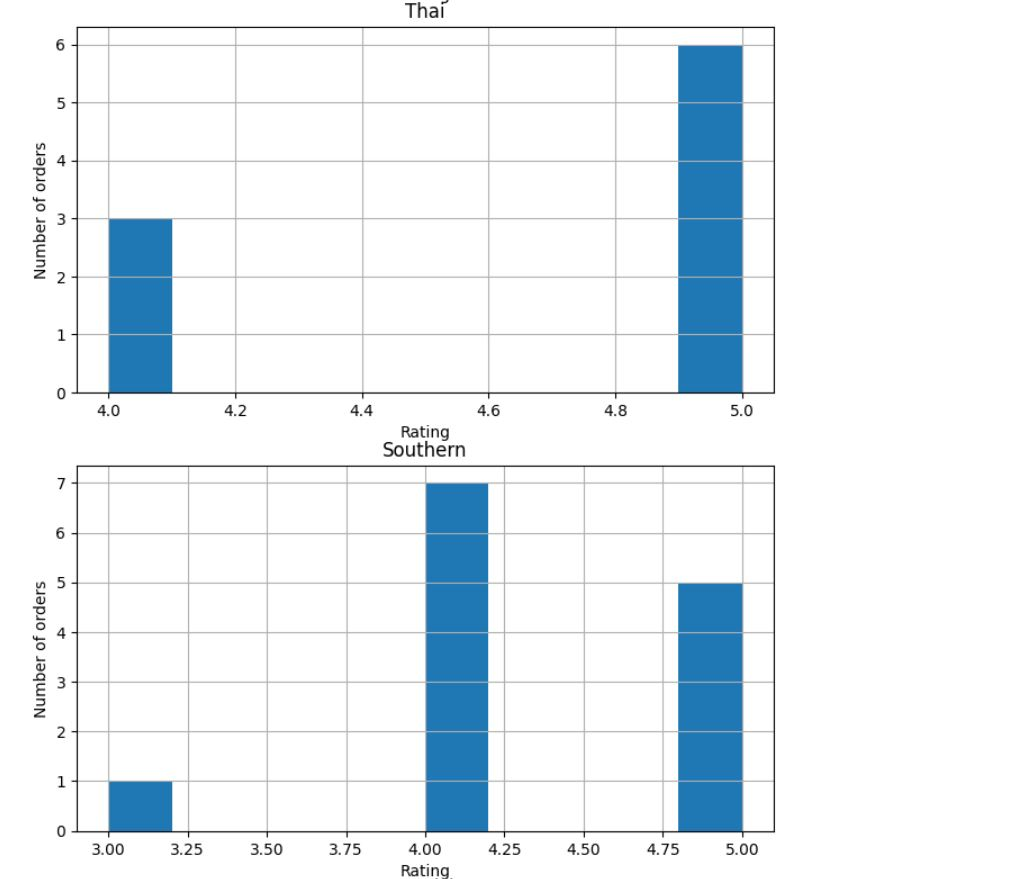

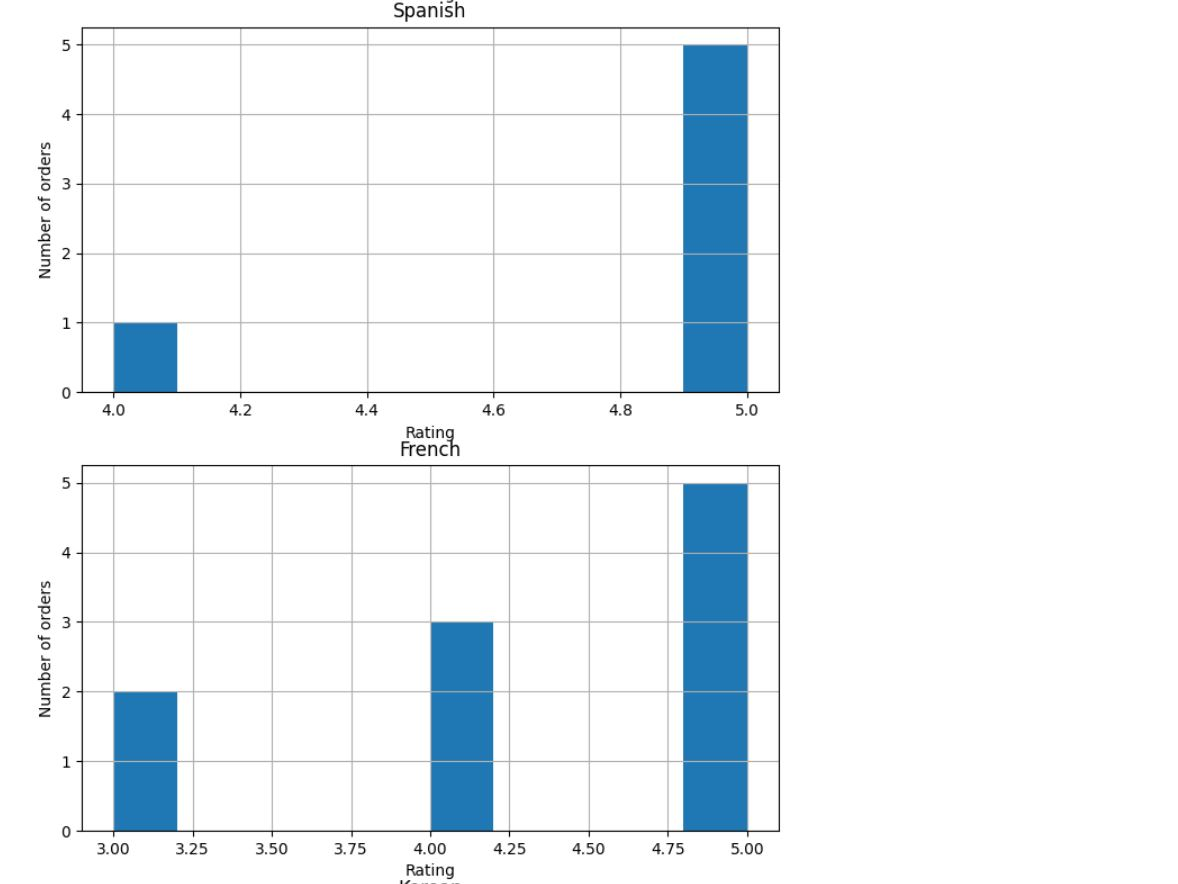

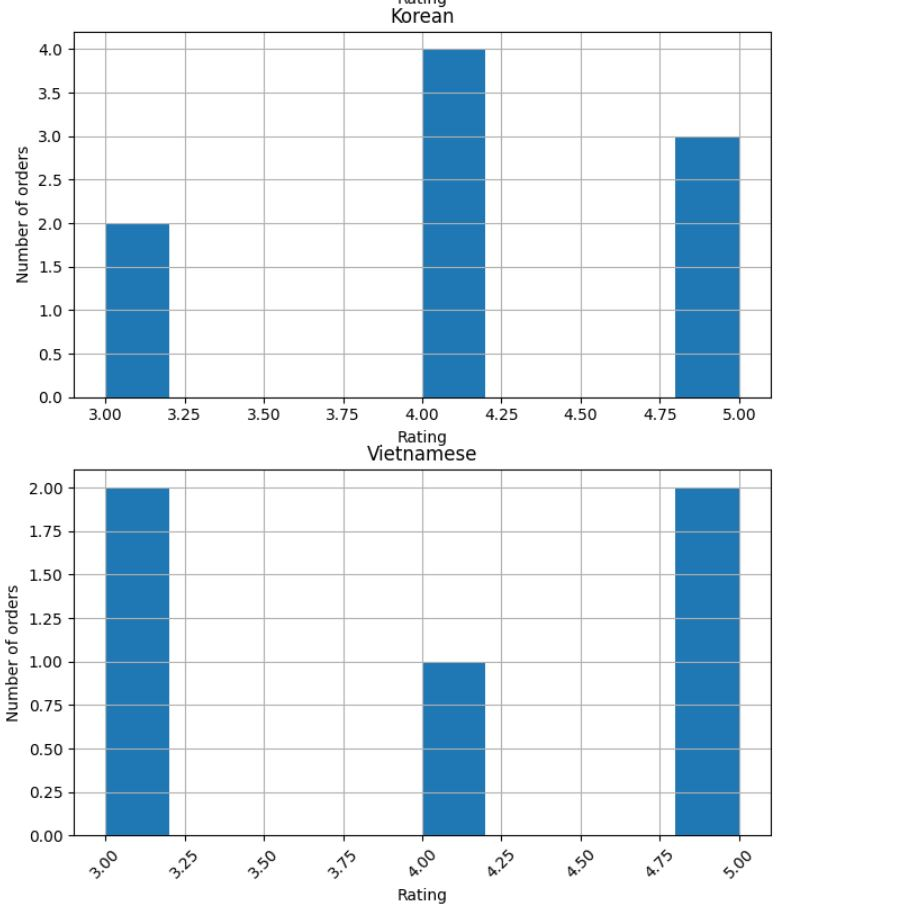


The follwing cuisine styles rating behaves in such a way

that least number of rating = 3 and most number of rating = 5 :

1) Mexican

2) American

3) Indian

4) Chinese

5) Japanese

6) Italian

7) Thai

8) Spanish

9) French

On the other hand, the follwing cuisine styles rating behaves in such a way

that least number of rating = 4 and most number of rating = 5 :

1) Mediterranean

2) Vietnamese

The follwing cuisine styles rating behaves in such a way

that least number of rating = 3 and most number of rating = 4 :

1) Middle eastern

2) Southern

3) Korean


In [39]:
import numpy as np

#to compute the average cost of each cuisine_type
#and total number of order of each food style

#plt.figure(figsize = (10,5))
list_of_cuisine_type=df['cuisine_type'].unique()
#print(list_of_cuisine_type)
num_of_order_per_rest_list=[]
avg_cost_food_type_list=[]
for cuisine_type in list_of_cuisine_type:
#  print(cuisine_type)
  df2=df.copy()
  df2=df2[df2['cuisine_type']==cuisine_type]
  num_of_order_this_cuisine_type=len(df2)
  total_cost_of_this_food_type=df2['cost_of_the_order'].sum()
  avg_cost_this_food_type=round(total_cost_of_this_food_type/num_of_order_this_cuisine_type,2)
  avg_cost_food_type_list.append(avg_cost_this_food_type)

  num_of_rest_this_cuisine_type=len(df2['restaurant_name'].unique())
#  num_of_order_per_rest = round(num_of_order_this_cuisine_type/num_of_rest_this_cuisine_type,2)
  num_of_order_per_rest = num_of_order_this_cuisine_type
  num_of_order_per_rest_list.append(num_of_order_per_rest)
#  print(avg_cost_this_food_type)
#  print(num_of_order_per_rest)
#  print(num_of_rest_this_cuisine_type)

avg_cost_food_type_list=np.array(avg_cost_food_type_list)
num_of_order_per_rest_list=np.array(num_of_order_per_rest_list)

print("###################")
print("List of all food style")
print(list_of_cuisine_type)
print("###################")
print("Average food cost for each style")
print(avg_cost_food_type_list)
print("###################")
print("Total number of order for each style")
print(num_of_order_per_rest_list)
print("###################")

#to compute correlation between the average cost of each cuisine_type and total number of order of each food style

r = np.corrcoef(avg_cost_food_type_list, num_of_order_per_rest_list)

print("Correlation matrix between average cost of each cuisine_type and total number of order of each food style")
print(r)
print("###################")




###################
List of all food style
['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']
###################
Average food cost for each style
[14.   16.3  16.93 16.32 16.92 16.42 15.47 16.31 18.82 19.21 19.3  19.79
 18.99 12.88]
###################
Total number of order for each style
[ 13 470  77 584  73 298  46 215  49  19  17  18  12   7]
###################
Correlation matrix between average cost of each cuisine_type and total number of order of each food style
[[ 1.         -0.18030111]
 [-0.18030111  1.        ]]
###################


This is the result of the above code

###################

List of all food style

['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'

 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'

 'Spanish' 'Vietnamese']

###################

Average food cost for each style

[14.   16.3  16.93 16.32 16.92 16.42 15.47 16.31 18.82 19.21 19.3  19.79

 18.99 12.88]

###################

Total number of order for each style

[ 13 470  77 584  73 298  46 215  49  19  17  18  12   7]

###################

Correlation matrix between average cost of each cuisine_type and total number

of order of each food style

[[ 1.         -0.18030111]

 [-0.18030111  1.        ]]

###################

We see that some negative correlation between

cost of each food style and the number of order

of that food style, the lower the cost the cheaper the food

and therefore more order of that food  will be.

This is explained by the fact that generally customer

prefer cheaper food assuming that generally speaking

most customer do not have any bias to any type of food.

In other words, most customer welcome any taste and style of

food and so food cuisine type is not main concern for their choice.

Rather, price of food play a more important role for their

consuming behaviour.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [40]:
# Write the code here

list_of_orders_with_rating=df['rating']!='Not given'
list_of_rest_with_sufficient_rating=df['restaurant_name'][list_of_orders_with_rating].value_counts() > 50
list_of_qualified_rest_with_num_of_ratings=df['restaurant_name'][list_of_orders_with_rating].value_counts()[list_of_rest_with_sufficient_rating]
print("List or restaurant(s) with number of ratings > 50:")
print(list_of_qualified_rest_with_num_of_ratings)
print("----")

#This is the results of the codes above:

#List or restaurant(s) with number of ratings > 50:
#Shake Shack                  133
#The Meatball Shop             84
#Blue Ribbon Sushi             73
#Blue Ribbon Fried Chicken     64
#Name: restaurant_name, dtype: int64

###########################################################
###########################################################
###########################################################
#Next, based on the results above, I moved forward to implement the following codes:

list_of_qualified_rest_name=['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken']
list_of_qualified_rest_name2=[]
j=0
for qualified_rest in list_of_qualified_rest_name:
 order_list_rest_1 = df['restaurant_name'] == qualified_rest #'Shake Shack'
 order_list_rest_1 = order_list_rest_1 & list_of_orders_with_rating
# print(order_list_rest_1.shape)
 rating_sum=0
 order_index=0
 for target_rest in order_list_rest_1:
   if(target_rest==True):
     rating_sum=rating_sum+int(df['rating'][order_index])
   order_index=order_index+1

 num_of_ratings = list_of_qualified_rest_with_num_of_ratings[j]
 average_rating = rating_sum/num_of_ratings
 print("-----------")
# print(order_index)
 print("Restaurant Name =", qualified_rest)
 print("Sum of ratings =", rating_sum)
 print("Number of ratings =", num_of_ratings)
 print("Average rating =",average_rating)
 if(average_rating > 4.0):
  list_of_qualified_rest_name2.append(qualified_rest)
  print(qualified_rest, " is qualified to earn the promotional offer")
 else:
  print(qualified_rest, " is NOT qualified to earn the promotional offer")
 j=j+1

print("-----------")
print("The following is the list of restaurant(s) qualified to earn the promotional offers(More than 50 ratings and average rating > 4.0):")
for qualified_rest in list_of_qualified_rest_name2:
   print(qualified_rest)

#The result is as below:
#Restaurant Name = Shake Shack
#Sum of ratings = 569
#Number of ratings = 133
#Average rating = 4.2781954887218046
#Shake Shack  is qualified to earn the promotional offer
#-----------
#Restaurant Name = The Meatball Shop
#Sum of ratings = 379
#Number of ratings = 84
#Average rating = 4.511904761904762
#The Meatball Shop  is qualified to earn the promotional offer
#-----------
#Restaurant Name = Blue Ribbon Sushi
#Sum of ratings = 308
#Number of ratings = 73
#Average rating = 4.219178082191781
#Blue Ribbon Sushi  is qualified to earn the promotional offer
#-----------
#Restaurant Name = Blue Ribbon Fried Chicken
#Sum of ratings = 277
#Number of ratings = 64
#Average rating = 4.328125
#Blue Ribbon Fried Chicken  is qualified to earn the promotional offer
#-----------
#The following is the list of restaurant(s) qualified to earn the promotional offers(More than 50 ratings and average rating > 4.0):
#Shake Shack
#The Meatball Shop
#Blue Ribbon Sushi
#Blue Ribbon Fried Chicken



List or restaurant(s) with number of ratings > 50:
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
Name: restaurant_name, dtype: int64
----
-----------
Restaurant Name = Shake Shack
Sum of ratings = 569
Number of ratings = 133
Average rating = 4.2781954887218046
Shake Shack  is qualified to earn the promotional offer
-----------
Restaurant Name = The Meatball Shop
Sum of ratings = 379
Number of ratings = 84
Average rating = 4.511904761904762
The Meatball Shop  is qualified to earn the promotional offer
-----------
Restaurant Name = Blue Ribbon Sushi
Sum of ratings = 308
Number of ratings = 73
Average rating = 4.219178082191781
Blue Ribbon Sushi  is qualified to earn the promotional offer
-----------
Restaurant Name = Blue Ribbon Fried Chicken
Sum of ratings = 277
Number of ratings = 64
Average rating = 4.328125
Blue Ribbon Fried Chicken  is qualified to earn the promotional offer
-----------
The followi

#### Observations:

List or restaurant(s) with number of ratings > 50:

Shake Shack                  133

The Meatball Shop             84

Blue Ribbon Sushi             73

Blue Ribbon Fried Chicken     64

Name: restaurant_name, dtype: int64

----

-----------

Restaurant Name = Shake Shack

Sum of ratings = 569

Number of ratings = 133

Average rating = 4.2781954887218046

Shake Shack  is qualified to earn the promotional offer

-----------

Restaurant Name = The Meatball Shop

Sum of ratings = 379

Number of ratings = 84

Average rating = 4.511904761904762

The Meatball Shop  is qualified to earn the promotional offer

-----------

Restaurant Name = Blue Ribbon Sushi

Sum of ratings = 308

Number of ratings = 73

Average rating = 4.219178082191781

Blue Ribbon Sushi  is qualified to earn the promotional offer

-----------

Restaurant Name = Blue Ribbon Fried Chicken

Sum of ratings = 277

Number of ratings = 64

Average rating = 4.328125

Blue Ribbon Fried Chicken  is qualified to earn the promotional offer

-----------

The following is the list of restaurant(s) qualified to earn the promotional

offers(More than 50 ratings and average rating > 4.0):

Shake Shack

The Meatball Shop

Blue Ribbon Sushi

Blue Ribbon Fried Chicken


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [41]:
# Write the code here
#The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars.
#Compute the net revenue generated by the company across all orders

total_cost_of_the_order_for_25_percent=df[df['cost_of_the_order'] > 20.0]['cost_of_the_order'].sum()
revenue_25_percent = total_cost_of_the_order_for_25_percent * 0.25


is_less_than_or_equal_20 = df['cost_of_the_order'] <= 20.0
is_more_than_5 = df['cost_of_the_order'] > 5.0

is_charged_15_percent = is_less_than_or_equal_20 & is_more_than_5
#is_charged_15_percent.shape
total_cost_of_the_order_for_15_percent=df[is_charged_15_percent]['cost_of_the_order'].sum()
revenue_15_percent=total_cost_of_the_order_for_15_percent*0.15

total_revenue = revenue_25_percent+revenue_15_percent

print("total_cost_of_the_order_for_25_percent=",total_cost_of_the_order_for_25_percent)
print("total_cost_of_the_order_for_15_percent=",total_cost_of_the_order_for_15_percent)
print("revenue_25_percent=",revenue_25_percent)
print("revenue_15_percent=",revenue_15_percent)
print("total_revenue=",total_revenue)

#Results:
#total_cost_of_the_order_for_25_percent= 14754.91
#total_cost_of_the_order_for_15_percent= 16517.170000000002
#revenue_25_percent= 3688.7275
#revenue_15_percent= 2477.5755000000004
#total_revenue= 6166.303

total_cost_of_the_order_for_25_percent= 14754.91
total_cost_of_the_order_for_15_percent= 16517.170000000002
revenue_25_percent= 3688.7275
revenue_15_percent= 2477.5755000000004
total_revenue= 6166.303


#### Observations:

total_cost_of_the_order_for_25_percent= 14754.91

total_cost_of_the_order_for_15_percent= 16517.170000000002

revenue_25_percent= 3688.7275

revenue_15_percent= 2477.5755000000004

total_revenue= 6166.303

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [42]:
# Write the code here
#The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)
#Here is the code implementation

list_of_order_takes_more_than_60_mins=(df['delivery_time'] + df['food_preparation_time']) > 60
num_of_orders_takes_more_than_60_mins=df[list_of_order_takes_more_than_60_mins].shape[0]
total_num_of_orders=df.shape[0]
percent_of_orders_over_60_mins=(num_of_orders_takes_more_than_60_mins/total_num_of_orders)*100.0
print("num_of_orders_takes_more_than_60_mins=",num_of_orders_takes_more_than_60_mins)
print("total_num_of_orders=",total_num_of_orders)
print("percent_of_orders_over_60_mins=",round(percent_of_orders_over_60_mins,2), "%")

#Result:
#num_of_orders_takes_more_than_60_mins= 200
#total_num_of_orders= 1898
#percent_of_orders_over_60_mins= 10.54 %


num_of_orders_takes_more_than_60_mins= 200
total_num_of_orders= 1898
percent_of_orders_over_60_mins= 10.54 %



#### Observations:
num_of_orders_takes_more_than_60_mins= 200

total_num_of_orders= 1898

percent_of_orders_over_60_mins= 10.54 %



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [43]:
# Write the code here
#The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?
#Here is the code implementation

weekDayMeanDeliveryTime=df['delivery_time'][df['day_of_the_week']=='Weekday'].mean()
weekEndMeanDeliveryTime=df['delivery_time'][df['day_of_the_week']=='Weekend'].mean()
print("weekDayMeanDeliveryTime(in mins)=",round(weekDayMeanDeliveryTime,2))
print("weekEndMeanDeliveryTime(in mins)=",round(weekEndMeanDeliveryTime,2))

#df['day_of_the_week']=='Weekend'
#Results:
#weekDayMeanDeliveryTime(in mins)= 28.34
#weekEndMeanDeliveryTime(in mins)= 22.47


weekDayMeanDeliveryTime(in mins)= 28.34
weekEndMeanDeliveryTime(in mins)= 22.47


#### Observations:
weekDayMeanDeliveryTime(in mins)= 28.34

weekEndMeanDeliveryTime(in mins)= 22.47

Mean delivery time during week day is greater than mean delivery time during week end.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions and Recommendations:

As mentioned before, result shows that weekday delivery time is much longer

than weekend delivery time because from Monday to Friday many people go to work

and therefore

very likely that large number of orders were made during lunch hour that only

limited manpower to deliver the food during this short period of time (assume

lunch hour last for 1 to 2 hours). As a result the time required to deliver the

food is longer during the weekday. In other words weekend deliver time is

shorter. However, we notice that number of order during weekend is much

more than that of weekday (more than 2 times that of weekday). More food

order on weekend but deliver time is shorter than weekday. This is very

hard to explain why more food order on weekend but deliver time is shorter than

weekday. Intuitively we think more food order implies more food to deliver

and therefore more time is required to deiver food assuming that the number

of delivery workers on weekday and weekend almost the same. To explain

why this strange thing happen, we can only explain this by the guess I just

mentioned which I quote it again as below:

From Monday to Friday many people go to work  and therefore

very likely that large number of orders were made during lunch hour that only

limited manpower to deliver the food during this short period of time (assume

lunch hour last for 1 to 2 hours). As a result the time required to deliver the

food is longer during the weekday. In other words weekend deliver time is

shorter. The actual deliver time is measured not just by total number

of order but also how many orders during certain period of time. That is

the transient effect, the sudden increase of order during very short period

of time as I mentioned which is the lunch hour. The data unfortunately

does not show the time of the order so we can just make a guess here.

Otherwise we can get the plot of the number of orders versus  what time

the order was made

and also the plot showing delivery time versus the what time

the order was made.

With this guess, we can suggest that more delivery workers should

be allocated in the weekday especially during lunch hour.


Another suggestion we can make is that, if we

want to decide what type of food any new restaurant in the future should

be, we should look at the market potential of each cuisine type

which was shown before from the top 3 food style (after averaging by

number of restaurant of that particular style):

1) Japanese

2) American

3) Chinese

So in the future, Japanese restaurant still has highest potential

in the market, American comes the second and the third is Chinese.

Thai and Vietnamese suffers from least number of order per restaurant

and it is NOT recommended to open any new restaurant of these 2 style.

Those Thai restaurants can either switch to other cuisine type, or

they need to pay more to the platform for more promotion and advertisment

of their food in order to save their business.


Lastly, as I mentioned before, we need to improve the

data collected so that the exact time of the food was ordered should also be

included for each order. Just weekend and weekday is not enough. We should

also include information of which day is. That is replacing {weekend/weekday}

with {Mon/Tue/Wed/Thur/Fri/Sat/Sun} and also the exact time when the food is

order should be included as well. In this way we can know

what is the peak hour for each type of restaurant will be and therefore

we can have more knowledge on whether we need to suggest more manpower

for food preparation of each type of restaurant and also

the distribution of manpower of food delivery workers during the day.

Least food delivery workers allocated to be on duty

during least busy hours and most food delivery workers allocated to be on duty

during most busy hours.



### Recommendations:

*  

---